In [19]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import math

In [20]:
def coth(a):
    if a>0: return (1+tf.math.exp(-2*a))/(1-tf.math.exp(-2*a))
    if a<0: return (tf.math.exp(2*a)+1)/(tf.math.exp(2*a)-1)
    if a==0: return 0

def tanh(a):
    if a>0: return (1-tf.math.exp(-2*a))/(1+tf.math.exp(-2*a))
    if a<0: return (tf.math.exp(2*a)-1)/(tf.math.exp(2*a)+1)
    if a==0: return 0

In [21]:
data=10000
batch=100
set=100
layer=10
n_ini=1.0
n_fin=0.1
dn=-0.1
c_reg1=0.006
c_reg2=0.0001
d=2

m^2= <tf.Variable 'Variable:0' shape=() dtype=float64, numpy=0.7616104584638963>
lam= <tf.Variable 'Variable:0' shape=() dtype=float64, numpy=2.0237952260549816>
alpha= <tf.Variable 'Variable:0' shape=() dtype=float64, numpy=-0.2696080105986213>
beta= <tf.Variable 'Variable:0' shape=() dtype=float64, numpy=-0.4546147271371427>
<tf.Variable 'Variable:0' shape=(10,) dtype=float64, numpy=
array([1.92697742, 1.87089211, 1.80273205, 1.19666207, 3.34989785,
       1.59629429, 1.92942294, 0.43128718, 1.56906188, 1.39958557])>


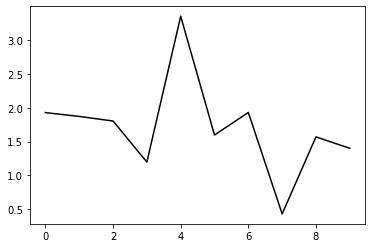

In [22]:
h=tf.zeros(layer)
h_in=[]
for i in range (layer):
    h_inn=np.float64(np.random.normal(2, 1))
    h_in.append(h_inn)
h=tf.Variable(h_in)
m2=tf.Variable(np.float64(np.random.normal(2, 1)))
lam=tf.Variable(np.float64(np.random.normal(1, 1)))
alpha=tf.Variable(np.float64(np.random.uniform(-0.5, 0.5)))
beta=tf.Variable(np.float64(np.random.uniform(-0.5, 0.5)))
#m2=tf.constant(np.float64(5.6))
#lam=tf.constant(np.float64(0.61))
#alpha=tf.constant(np.float64(1.444635))
#beta=tf.constant(np.float64(0.00615))
print("m^2=", m2)
print("lam=", lam)
print("alpha=", alpha)
print("beta=", beta)
print(h)
plt.plot(h.numpy(), 'k-')
plt.show()

In [23]:
def F_func(m, la, a,b):
    return 2*b/n_fin-m*a-la*(a**3)

def t_func(a):
    return 0.5*(tf.math.tanh(100*(a-0.1))-tf.math.tanh(100*(a+0.1))+2)

In [24]:
x=[i*0.2 for i in range (30)]
y=[0.0, 0.018, 0.035, 0.053, 0.0715, 0.0895, 0.107, 0.125, 0.146, 0.1665, 0.1875, 0.2085, 0.229, 0.25, 0.265, 0.281, 0.296, 0.3115, 0.3275, 0.343, 0.3565, 0.385, 0.4375, 0.5, 0.6, 0.675, 0.735, 0.815, 0.865, 0.885]
y[:]=[2*v for v in y]
fp1 = np.polyfit(x, y, 15)
print(fp1)

[ 1.59046394e-05 -6.81729682e-04  1.31412795e-02 -1.50525136e-01
  1.14052774e+00 -6.02241647e+00  2.27455168e+01 -6.20704699e+01
  1.22166922e+02 -1.71187074e+02  1.66428955e+02 -1.07461552e+02
  4.28229887e+01 -9.20544914e+00  9.55260239e-01 -1.30911492e-04]


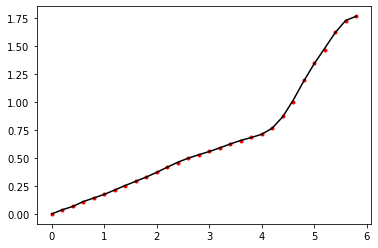

In [25]:
def f(x):
    y=0
    for i in range (16):
        y=y+fp1[i]*x**(15-i)
    return y
yy=[f(i*0.2) for i in range (30)]
plt.plot(x, y, 'r.')
plt.plot(x, yy, 'k-')
plt.show()

In [26]:
def NN_func_p(f):
    Positive=[]
    append=Positive.append
    while len(Positive)<batch:
        H=np.random.uniform(0.0, 6.0)
        M=np.random.uniform(0.0, 2.0)
        noise=np.abs(np.random.normal(0, 0.1))
        if np.abs(M-f(H))<=noise: append([H, M])
        else: continue
    return Positive
def NN_func_n(f):
    Negative=[]
    append=Negative.append
    while len(Negative)<batch:
        H=np.random.uniform(0.0, 6.0)
        M=np.random.uniform(0.0, 2.0)
        noise=np.abs(np.random.normal(0, 0.1))
        if np.abs(M-f(H))>noise: append([H, M])
        else: continue
    return Negative

In [27]:
Positive=[]
Negative=[]
for i in range (set):
    Positive.insert(i, NN_func_p(f))
    Negative.insert(i, NN_func_n(f))

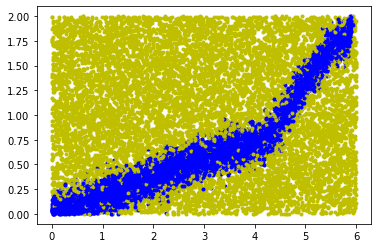

In [28]:
x_data1=[]
y_data1=[]
x_data2=[]
y_data2=[]
for i in range (set):
    x_data1.insert(i, [v[0] for v in Positive[i]])
    y_data1.insert(i, [v[1] for v in Positive[i]])
    x_data2.insert(i, [v[0] for v in Negative[i]])
    y_data2.insert(i, [v[1] for v in Negative[i]])
    plt.plot(x_data2[i], y_data2[i], 'y.')
    plt.plot(x_data1[i], y_data1[i], 'b.')
plt.show()

In [29]:
def Dfunc(hh, m):
    D=tf.math.sqrt(tf.math.abs(1+4*m/(hh[0]**2)))
    return D

In [30]:
def LP2(hh, m, la, alpha, beta, HH, MM):
    D=Dfunc(hh, m)
    phi=alpha*HH+beta*MM
    pi=(d/2)*(D-1)*alpha*HH+(d/2)*(-D-1)*beta*MM
    for j in range (layer-1):
        phi1=phi+dn*pi
        pi1 =phi*m*dn+(1-dn*hh[j])*pi+dn*la*(phi1**3)
        phi=phi1
        pi=pi1
    return phi, pi
def NN_func_01(hh, m, la, alpha, beta, list_hr):
    PP=[]
    NN=[]
    H=np.array(list_hr)[:, 0]
    M=np.array(list_hr)[:, 1]
    F=np.array(tf.math.abs(LP2(hh, m, la, alpha, beta, H, M)[1]))
    for i in range (len(H[F<0.1])):
        PP.append([H[F<0.1][i], M[F<0.1][i]])
    for i in range (len(H[F>=0.1])):
        NN.append([H[F>=0.1][i], M[F>=0.1][i]])
    return PP, NN

In [31]:
Positive0=[]
Positive1=[]
Negative0=[]
Negative1=[]
for i in range (set):
    Positive0.insert(i, NN_func_01(h, m2, lam, alpha, beta, Positive[i])[0])
    Positive1.insert(i, NN_func_01(h, m2, lam, alpha, beta, Positive[i])[1])
    Negative0.insert(i, NN_func_01(h, m2, lam, alpha, beta, Negative[i])[0])
    Negative1.insert(i, NN_func_01(h, m2, lam, alpha, beta, Negative[i])[1])

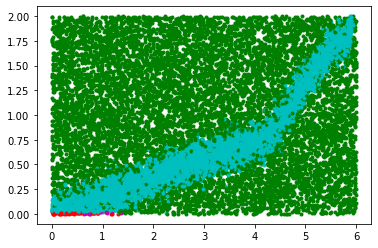

In [32]:
x_data1=[]
y_data1=[]
x_data2=[]
y_data2=[]
x_data3=[]
y_data3=[]
x_data4=[]
y_data4=[]
for i in range (set):
    x_data1.insert(i, [v[0] for v in Positive0[i]])
    y_data1.insert(i, [v[1] for v in Positive0[i]])
    x_data2.insert(i, [v[0] for v in Positive1[i]])
    y_data2.insert(i, [v[1] for v in Positive1[i]])
    x_data3.insert(i, [v[0] for v in Negative0[i]])
    y_data3.insert(i, [v[1] for v in Negative0[i]])
    x_data4.insert(i, [v[0] for v in Negative1[i]])
    y_data4.insert(i, [v[1] for v in Negative1[i]])
    plt.plot(x_data4[i], y_data4[i], 'g.')
    plt.plot(x_data2[i], y_data2[i], 'c.')
    plt.plot(x_data1[i], y_data1[i], 'r.')
    plt.plot(x_data3[i], y_data3[i], 'm.')
plt.show()

# Error function

$E=\sum_{data} \left\vert y(\bar{x}^{(1)}) - \bar{y} \right\vert+E_{reg}(W)$
, $E_{reg}=c_{reg}^{(1)}\sum_{n=1}^{N-1}(\eta^{(n)})^{4}(h(\eta^{(n+1)})-h(\eta^{(n)}))^{2}+c_{reg}^{(2)}(h(\eta^{(N)})-1/\eta^{(N)})^{2}$

In [33]:
def Error_func(hh, m, la, alpha, beta, list1, list2):
    H0=np.array([v[0] for v in list1])
    M0=np.array([v[1] for v in list1])
    H1=np.array([v[0] for v in list2])
    M1=np.array([v[1] for v in list2])
    H_0, M_0=LP2(hh, m, la, alpha, beta, H0, M0)
    H_1, M_1=LP2(hh, m, la, alpha, beta, H1, M1)
    PPlist=t_func(M_0)
    NNlist=t_func(M_1)
    sum_p=sum(PPlist)/batch
    sum_n=(batch-sum(NNlist))/batch

    inside=0
    for k in range (layer-1):
        second=((n_ini+k*dn)**4)*((hh[k+1]-hh[k])**2)
        inside=inside+second
    E_reg1=c_reg1*inside
    E_reg2=c_reg2*((hh[layer-1]-1/n_fin)**2)
    return sum_n+sum_p+E_reg1+E_reg2

In [34]:
for i in range (set):
    print(Error_func(h, m2, lam, alpha, beta, Positive[i], Negative[i]))

tf.Tensor(1.007856078920935, shape=(), dtype=float64)
tf.Tensor(1.0178565998407094, shape=(), dtype=float64)
tf.Tensor(1.0178565981642564, shape=(), dtype=float64)
tf.Tensor(1.0179633692727013, shape=(), dtype=float64)
tf.Tensor(1.0078672850331367, shape=(), dtype=float64)
tf.Tensor(1.017831429634807, shape=(), dtype=float64)
tf.Tensor(1.0170666057282176, shape=(), dtype=float64)
tf.Tensor(1.0178565998407096, shape=(), dtype=float64)
tf.Tensor(1.017856599820483, shape=(), dtype=float64)
tf.Tensor(1.0178103969565333, shape=(), dtype=float64)
tf.Tensor(0.9837110816435265, shape=(), dtype=float64)
tf.Tensor(1.0178565998407096, shape=(), dtype=float64)
tf.Tensor(0.9881929359779477, shape=(), dtype=float64)
tf.Tensor(1.0178572536029316, shape=(), dtype=float64)
tf.Tensor(0.9987327925571597, shape=(), dtype=float64)
tf.Tensor(1.0178565998407096, shape=(), dtype=float64)
tf.Tensor(0.9978226138626827, shape=(), dtype=float64)
tf.Tensor(1.0278565976776588, shape=(), dtype=float64)
tf.Tensor(1.0

# Optimize

0 1.0066346240552428
0.7546535648326488 2.0236998560131005 -0.27167899271968565 -0.4465875928701635
[1.87702142 1.92067436 1.75274418 1.24665885 3.29990117 1.64628433
 1.87946457 0.48123519 1.51931744 1.44956838]


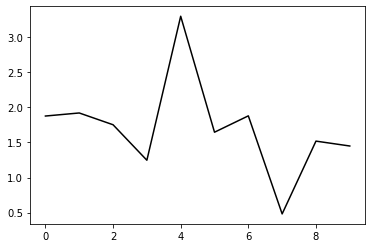

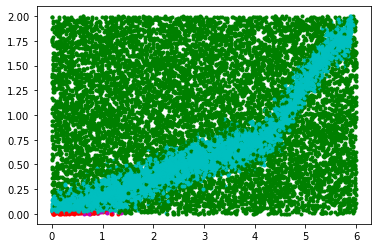

1000 0.6915439975241852
0.7328841008756826 1.7270404873950636 -0.06879427713579563 -0.07736755824357736
[ 1.02908576  1.28859571  1.45029281  1.36740859  1.12391106  0.39016252
 -0.6150215  -1.79949775 -1.44362639  6.04467458]


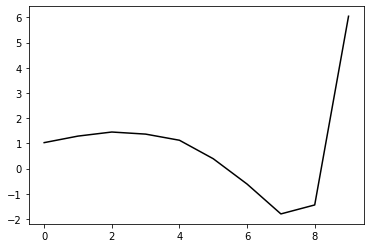

2000 0.369606219033674
0.764386679476878 1.6535553859881265 -0.06827096943818191 -0.07685680947009853
[ 0.86753804  1.25167449  1.5079112   1.55927916  1.3394473   0.72059845
 -0.29173037 -1.52213031 -1.29797231  9.00312016]


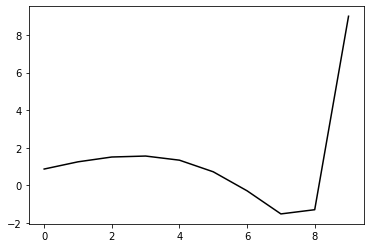

3000 0.38468385273927785
0.7787223200964092 1.547465388935316 -0.053603319876305226 -0.07385386920300546
[ 0.76944369  1.05465356  1.2647663   1.32335416  1.13341896  0.56113417
 -0.47108227 -1.77876163 -1.68787192  8.95458496]


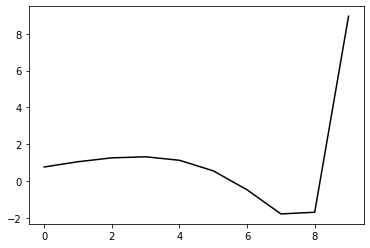

4000 0.3104381000514798
0.7987949071844205 1.45257965387279 -0.05436358639343297 -0.08259361546672328
[ 0.70700639  0.99121029  1.19508754  1.26956044  1.12537104  0.61831139
 -0.3829858  -1.72205062 -1.71540514  8.93993158]


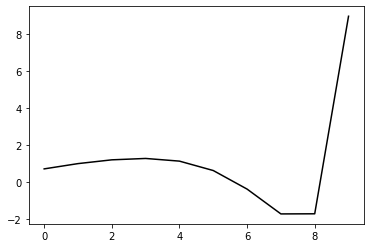

5000 0.3755476699794725
0.7985721076040386 1.3455827194975596 -0.05346711078744536 -0.08079574636778439
[ 0.70478362  0.81395437  0.95561663  0.9998732   0.85938181  0.38425524
 -0.59914006 -1.99278609 -2.11321685  8.96062973]


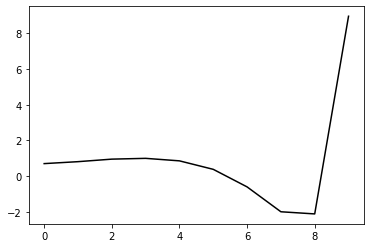

6000 0.518013925349711
0.8169318753792121 1.2318264956434413 -0.05300878710725647 -0.08408526719197451
[ 0.6719415   0.80481672  0.93573506  0.98007139  0.85902296  0.43314629
 -0.49738405 -1.9058212  -2.1194586   8.94279099]


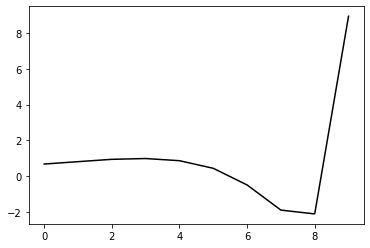

7000 0.3531992192395976
0.8323006479635119 1.0789544702431821 -0.05135384322292913 -0.09020310911460475
[ 0.64724046  0.83737448  0.95291149  0.98452817  0.87453934  0.48585383
 -0.39389108 -1.80322599 -2.10525516  8.90466003]


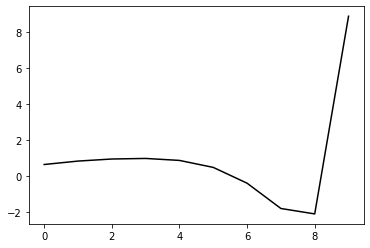

8000 0.43307547377948646
0.8330540553202741 0.9584699720007402 -0.05796956598723423 -0.08862876405530075
[ 0.64132115  0.75294092  0.83332237  0.83877772  0.70493591  0.30721208
 -0.56584778 -2.01530628 -2.46514991  8.93436638]


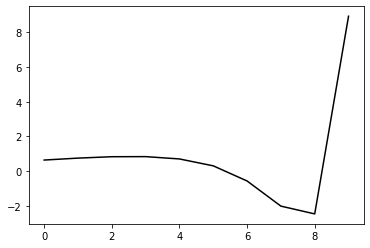

9000 0.367278012821043
0.8395049179139842 0.8330390939266838 -0.05765738534738114 -0.09754555855158194
[ 0.62559365  0.7875595   0.86322137  0.85925356  0.72038827  0.33212311
 -0.51494959 -1.96450616 -2.50362314  8.90733509]


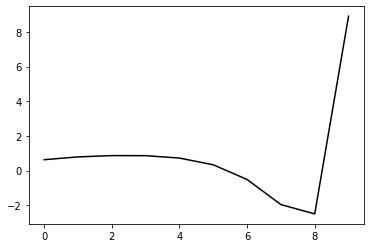

10000 0.26900311427460993
0.8538765690310608 0.679415163424554 -0.05896559026370721 -0.10296883668103646
[ 0.61938457  0.79412528  0.84784969  0.82336172  0.67248663  0.28247865
 -0.54895071 -1.99335403 -2.6015309   8.87776945]


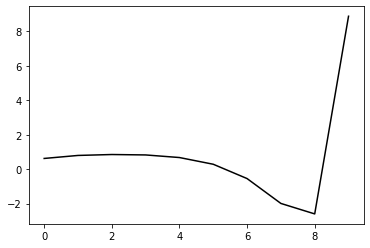

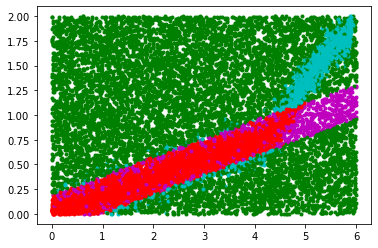

11000 0.5116951094650996
0.8497582843023801 0.5653247348717757 -0.055717842112571546 -0.1089595631286344
[ 0.68452956  0.67612419  0.72897114  0.70300024  0.54157514  0.1411114
 -0.69233142 -2.15209466 -2.8664591   8.84427631]


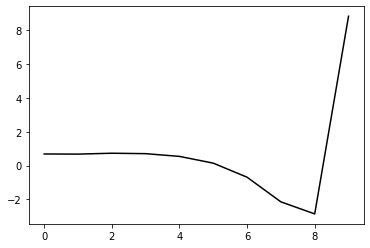

12000 0.36366421203884974
0.8569439245130255 0.358092055102962 -0.06000719587864809 -0.10883201003163447
[ 0.63223211  0.7468175   0.78113831  0.7356422   0.56505597  0.16126992
 -0.66918992 -2.13316175 -2.92395944  8.87647299]


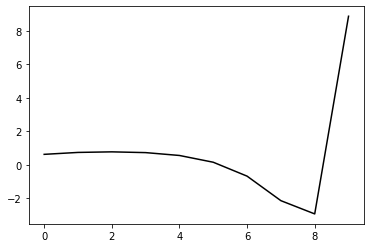

13000 0.41026078495935003
0.8505392331088137 0.17361648370390012 -0.06323679856538227 -0.10752208459474112
[ 0.63474087  0.68425502  0.70014309  0.64163617  0.45216375  0.02814763
 -0.81929253 -2.310005   -3.2152277   8.82254036]


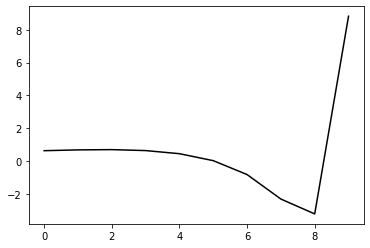

14000 0.3349201028061761
0.8597228463079857 0.05496706145715754 -0.06575277740900815 -0.11982394678466474
[ 0.61914233  0.74577379  0.78655107  0.74455405  0.56986481  0.16043644
 -0.66937792 -2.14618452 -3.10652828  8.85177067]


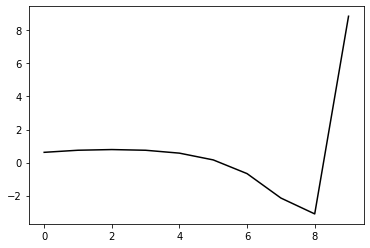

15000 0.29323854340023836
0.820199975865217 -0.3196744212445195 -0.07950954833236093 -0.10922419206093183
[ 0.67360202  0.6344087   0.58648726  0.51009697  0.31579725 -0.11386104
 -0.9660068  -2.47294065 -3.52594467  8.81054424]


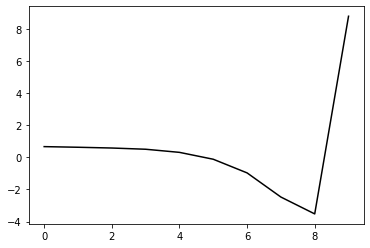

16000 0.2154188441578355
0.7201836571843937 -0.7153993285281849 -0.11948947328999344 -0.15059099353796748
[ 0.84917168  0.78195729  0.76955781  0.74114467  0.62683815  0.29158261
 -0.47449248 -1.91287672 -2.9505453   8.85237911]


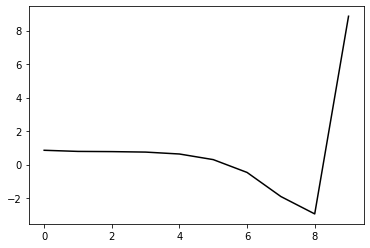

17000 0.2564721466063438
0.6958041248666311 -0.7018656157156246 -0.12485549865859476 -0.14120563220030055
[ 1.00590655  0.86457271  0.87833728  0.90614285  0.87925795  0.65226538
 -0.02443941 -1.44223095 -2.61473981  8.89871621]


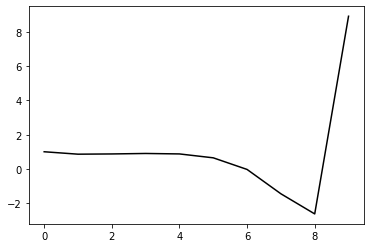

18000 0.2051842857890802
0.6780226445399885 -0.6869369064301636 -0.12731927324776426 -0.12725625825039047
[ 1.03649184  0.97342837  0.97410846  0.98538444  0.95798963  0.7626431
  0.13587697 -1.267011   -2.56247374  8.90905342]


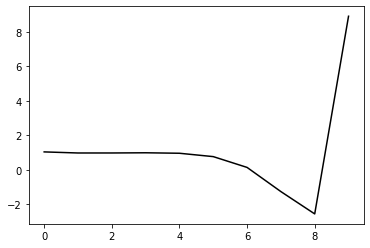

19000 0.23375654850465283
0.6572386284232631 -0.6766021413221929 -0.12958286089196575 -0.12067841454035029
[ 1.08007876  1.06054363  1.0683782   1.08447483  1.06681118  0.90242753
  0.33680312 -1.01718761 -2.39673034  8.91225575]


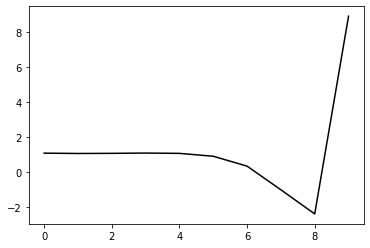

20000 0.21468680894269032
0.6399814001862383 -0.6672784036081503 -0.1315292299644854 -0.11537950106030768
[ 1.11053053  1.09682467  1.12664655  1.1463186   1.12342964  0.96811613
  0.44672255 -0.85306343 -2.28667938  8.92243183]


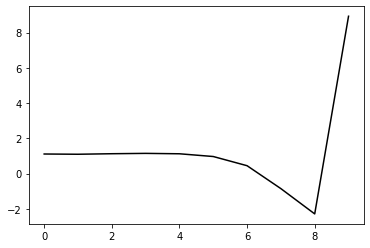

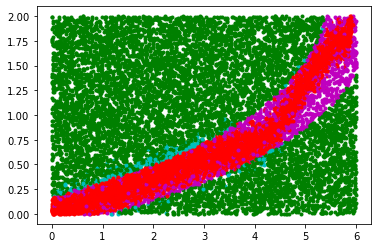

21000 0.14452226344519956
0.6229378069427655 -0.6608682033007165 -0.13536542880570926 -0.11112302944342532
[ 1.09771859  1.15652391  1.20117073  1.20955024  1.16677329  0.99393188
  0.4755731  -0.80549062 -2.32002547  8.90357999]


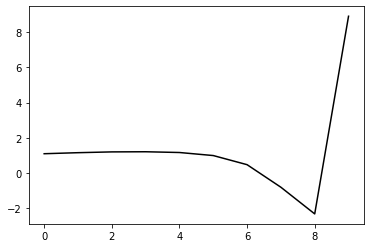

22000 0.2601110770139356
0.6023456199423692 -0.6516612443129641 -0.13411936502108307 -0.11064588838408553
[ 1.12517849  1.17709578  1.23741006  1.28186761  1.26335691  1.10290727
  0.60350821 -0.64612634 -2.23432313  8.91791803]


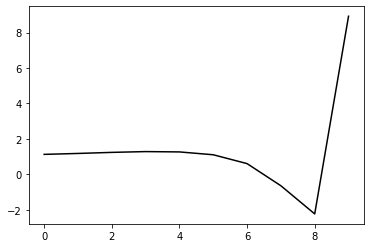

23000 0.20898608261676815
0.5833620676387371 -0.6391666325485152 -0.13221697137901908 -0.10619108280715496
[ 1.15140485  1.22986425  1.28467638  1.33049339  1.32078751  1.1682796
  0.67875816 -0.55175158 -2.20706519  8.88455112]


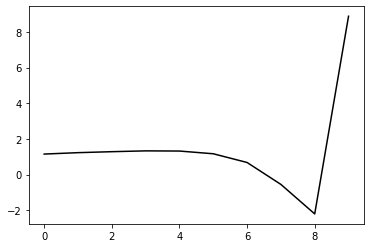

24000 0.14496142696346187
0.5663129436309015 -0.6320542029828328 -0.13456724840338855 -0.10432245882923545
[ 1.17657383  1.2477545   1.32322314  1.37366281  1.36668775  1.2254373
  0.75894038 -0.43314073 -2.11189644  8.93821184]


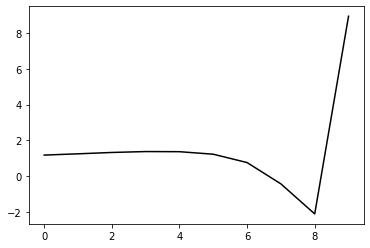

25000 0.19209175329679706
0.5494981791689975 -0.6234802203596658 -0.131952476948274 -0.10501994607185641
[ 1.18493401  1.22078064  1.32051671  1.3714108   1.34700136  1.18386263
  0.70531782 -0.47949564 -2.19616448  8.92611128]


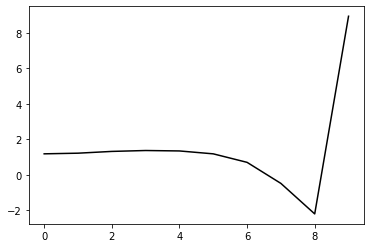

26000 0.1943750829900464
0.5387974977749236 -0.6150434634677993 -0.1327706683876496 -0.10213068787597789
[ 1.18206592  1.26634397  1.35396816  1.41534812  1.41131914  1.26346043
  0.80084436 -0.35471458 -2.09378305  8.97424259]


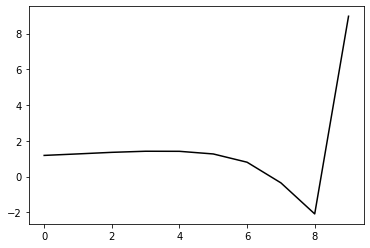

27000 0.20168294401707196
0.5266918672859733 -0.6065945257041933 -0.13271930843496774 -0.10428564884207306
[ 1.14829597  1.31784644  1.40265109  1.44607962  1.4224767   1.25916736
  0.7863177  -0.36546551 -2.13658756  8.94694292]


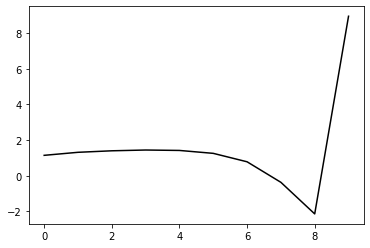

28000 0.2516043358967229
0.5103169680881169 -0.6002111654693639 -0.1323854631292593 -0.10276810262882854
[ 1.17253324  1.18887633  1.28615018  1.35755096  1.36311555  1.2300311
  0.79164247 -0.31697407 -2.08436601  8.90544774]


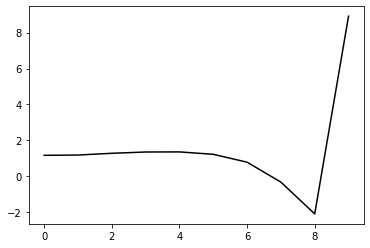

29000 0.24353982270149052
0.5027640730182215 -0.5921400783648207 -0.1333642991923394 -0.10372909197232677
[ 1.19512699  1.17380062  1.25988212  1.32690489  1.34708761  1.2433443
  0.83936478 -0.23133893 -2.00031576  8.94456502]


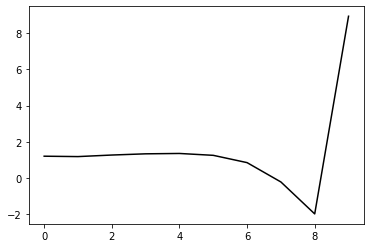

30000 0.14494181263307965
0.48630037546412297 -0.5802228392616373 -0.1311926644315348 -0.09920321948937316
[ 1.19102547  1.20581204  1.25154977  1.30407876  1.31727311  1.21306329
  0.81648444 -0.24335464 -2.04153436  8.97888231]


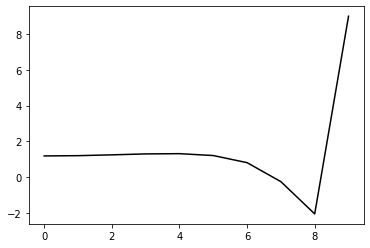

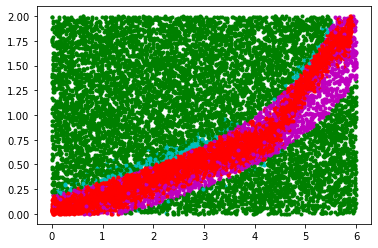

31000 0.23161865103607465
0.47342383273856736 -0.5783236367061477 -0.1339298180657769 -0.10266147104225566
[ 1.20551024  1.19853981  1.29996878  1.36486424  1.37141972  1.26491794
  0.88145395 -0.15100638 -1.94247012  8.96985606]


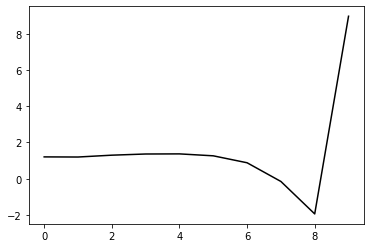

32000 0.23141830836752433
0.4666648551788792 -0.5688374728696667 -0.13389241915979927 -0.10293894931587586
[ 1.15205864  1.26539409  1.35995792  1.41116816  1.40391619  1.27868237
  0.88221694 -0.15003989 -1.96115367  8.94591129]


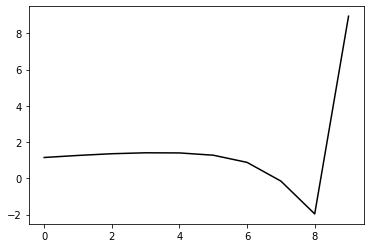

33000 0.23081613406194207
0.4511807956212693 -0.5631157458623554 -0.13520367278455717 -0.10386524310136053
[ 1.20804236  1.22481835  1.3327756   1.41396769  1.42895641  1.31050918
  0.91121108 -0.1202033  -1.95288643  8.95488059]


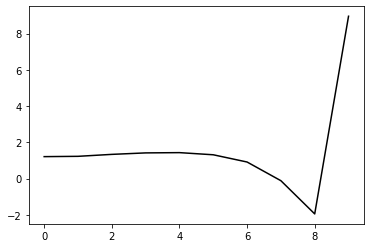

34000 0.1968000281571942
0.44959516598654353 -0.5555297054259227 -0.13579902205841685 -0.10336548014516787
[ 1.20891614  1.2262906   1.34418087  1.43068243  1.44469995  1.32143338
  0.91728131 -0.10662395 -1.93893648  8.960427  ]


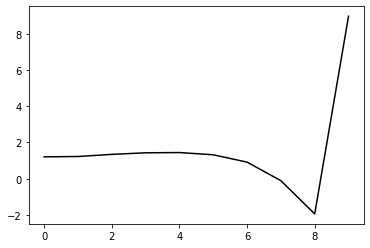

35000 0.19577227628602714
0.4408943902460663 -0.5470906127747467 -0.13513600907662543 -0.1017981996424981
[ 1.18524953  1.18886253  1.30447745  1.39264653  1.413145    1.29752679
  0.89647312 -0.12321614 -1.96424648  8.92708728]


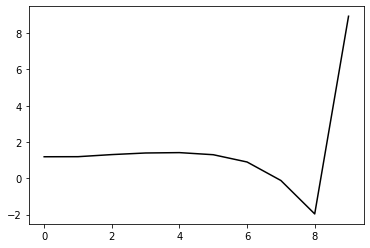

36000 0.22462569386491843
0.43741967157062234 -0.5390252282169563 -0.1356280814619899 -0.10241521153621633
[ 1.12106238  1.25641942  1.35631324  1.42850224  1.43397726  1.30524163
  0.89123875 -0.13853121 -1.99364579  8.9216215 ]


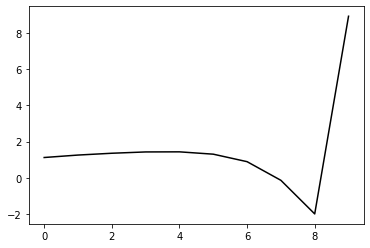

37000 0.1904003650561435
0.43493202469732145 -0.5318520290014198 -0.1355512263545351 -0.10392913190120895
[ 1.12835756  1.26637188  1.37787251  1.43972292  1.42879242  1.2847078
  0.85965264 -0.17524475 -2.03443434  8.94775109]


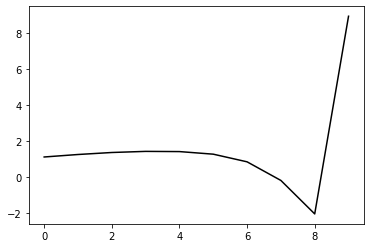

38000 0.26788963203010535
0.41926302691799566 -0.5289288004385385 -0.13730000468497316 -0.10054105939455546
[ 1.11498668  1.14822571  1.19950238  1.23471556  1.21693216  1.0699805
  0.64194577 -0.39267859 -2.25268538  8.95802907]


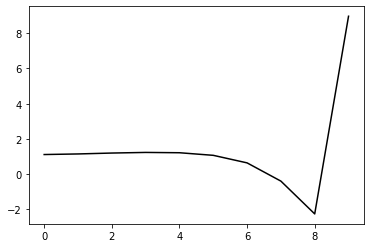

39000 0.22106632228875672
0.4215395672406231 -0.5174984335240647 -0.137082301143051 -0.10267070989274765
[ 1.18745187  1.21721105  1.33555149  1.41185578  1.4162407   1.28727835
  0.87570703 -0.14533351 -1.99796755  8.94721382]


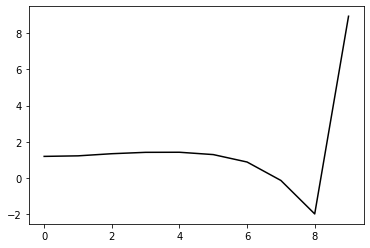

40000 0.15396394163077623
0.41878716960644424 -0.5098911434625074 -0.1390268614262627 -0.10230808764756517
[ 1.15798588  1.21054594  1.32052408  1.40568476  1.4252416   1.30603325
  0.8981604  -0.12331889 -1.9840005   8.95336448]


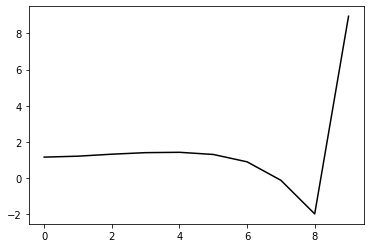

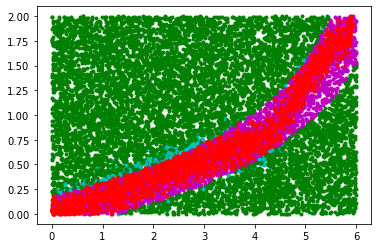

41000 0.22955635718965947
0.4146320030566036 -0.5018713763714109 -0.1390834109089049 -0.09960550825182407
[ 1.19485103  1.26348136  1.37962161  1.46616269  1.48883985  1.37454428
  0.96723813 -0.05880783 -1.93048384  8.9456362 ]


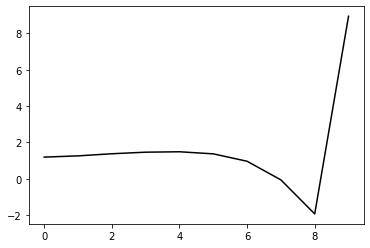

42000 0.212138139331362
0.3996745992305862 -0.4975813809725607 -0.13861548074393787 -0.09872557888784145
[ 1.16666769  1.18991197  1.28063971  1.33668398  1.33545987  1.20752569
  0.79374347 -0.2376659  -2.11732236  8.9609243 ]


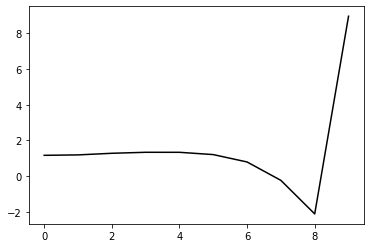

43000 0.1859115142112721
0.39861869403999395 -0.4910526724988704 -0.13963637671173387 -0.09867396671052871
[ 1.18867161  1.24135013  1.35563613  1.44008747  1.45355977  1.33144839
  0.92226128 -0.10730117 -1.99210252  8.96358442]


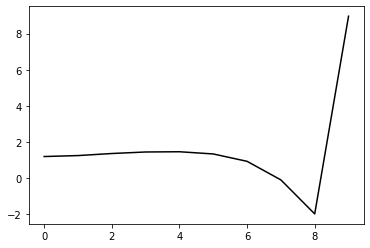

44000 0.2169109365334319
0.3944198447057492 -0.4835769479726332 -0.13916394003641958 -0.0995025334010857
[ 1.14921904  1.23604614  1.31891312  1.38353476  1.39949131  1.28940884
  0.8952682  -0.11795142 -1.99092843  8.94587609]


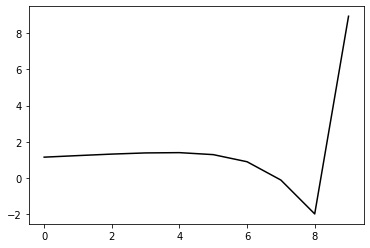

45000 0.24022293824735888
0.3927039521662597 -0.4793231114078789 -0.14050898055798075 -0.09887966808980675
[ 1.15263884  1.27100749  1.39007763  1.47393905  1.4927715   1.38565648
  0.99599231 -0.0141643  -1.88854321  8.94085694]


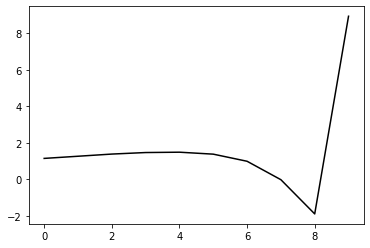

46000 0.21713518009293
0.3834880063130684 -0.4788236505169596 -0.14322160009767923 -0.1015415343361865
[ 1.17649472  1.27976224  1.39136882  1.47594023  1.50076556  1.39636576
  1.01242184  0.01271467 -1.85071424  8.92515046]


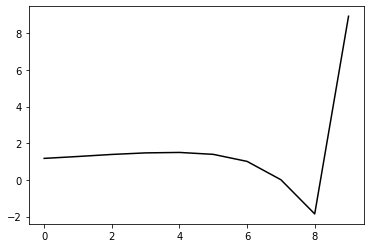

47000 0.1488815077213041
0.38321616015981086 -0.4700019074254283 -0.14209186645357155 -0.09930408699680042
[ 1.17962926  1.21064873  1.31489603  1.40839368  1.44738564  1.36122147
  0.99765189  0.02027208 -1.82463893  8.96271235]


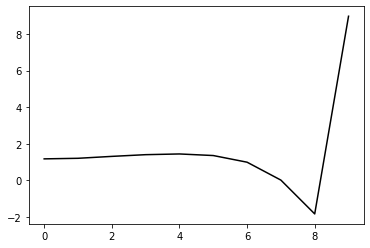

48000 0.22142924046432066
0.383861423799002 -0.463001888919417 -0.14126332816666 -0.10049726903502672
[ 1.15469516  1.16811945  1.25630434  1.30334947  1.29782335  1.18255315
  0.80278681 -0.17998454 -2.02348677  8.94686568]


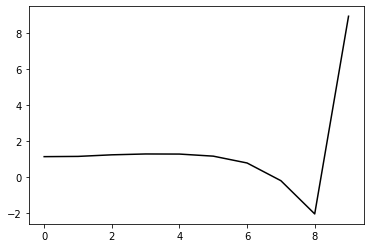

49000 0.2409161635727078
0.3792128613059542 -0.4575927327105803 -0.14231133750413025 -0.09902425686205477
[ 1.18219175  1.20451008  1.29608981  1.37030567  1.38879973  1.28594441
  0.91699418 -0.0529775  -1.8866863   8.94509783]


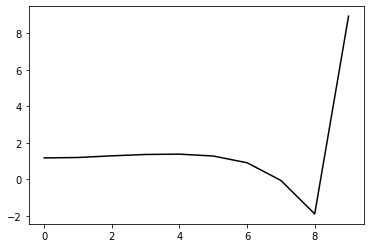

50000 0.13813720513354943
0.37301789020208187 -0.45029221301390293 -0.14107955611485792 -0.10055732484249237
[ 1.15437175  1.1546952   1.23474209  1.31302795  1.34825301  1.2707136
  0.92938188 -0.00966522 -1.81241283  8.95864041]


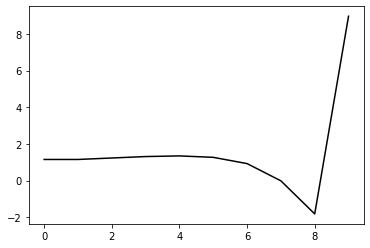

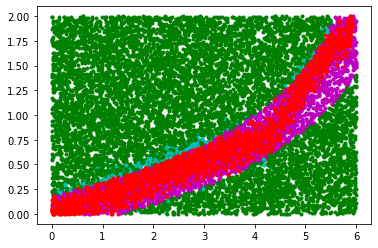

51000 0.22807923659303428
0.3629694678897222 -0.4487300390752339 -0.14412888208111768 -0.10385043537904283
[ 1.16109209  1.15380232  1.22239769  1.27988112  1.29806233  1.21865432
  0.88632192 -0.03796159 -1.82398808  8.91989228]


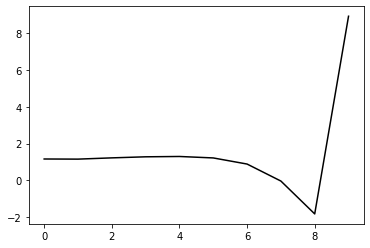

52000 0.17892478447778465
0.36377715086299683 -0.4410203526675719 -0.1442150360838833 -0.10379919080184047
[ 1.14439713  1.15960272  1.22842661  1.27948843  1.28494254  1.1907999
  0.85731685 -0.05437993 -1.82298934  8.93911798]


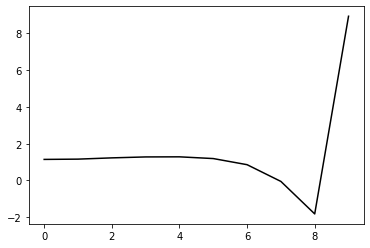

53000 0.17774610751005937
0.3640141921778686 -0.4327627181644208 -0.1435529946038568 -0.10473940368372703
[ 1.13664145e+00  1.17123762e+00  1.25678654e+00  1.31723163e+00
  1.32552353e+00  1.22894789e+00  8.94754284e-01 -5.48057187e-03
 -1.75524163e+00  9.00208313e+00]


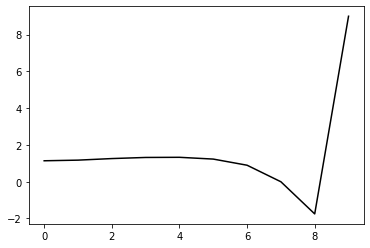

54000 0.17206843197652116
0.3638091373844998 -0.42815324234130325 -0.14590662576487046 -0.10484637657709901
[ 1.14265643  1.20529221  1.27560548  1.32219913  1.31323013  1.1995285
  0.85175241 -0.05156455 -1.79803039  8.98448621]


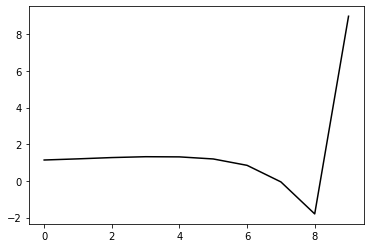

55000 0.25211329790683223
0.36232911795068085 -0.4222603242607453 -0.14576360632081592 -0.1055179316627285
[ 1.14260274  1.19862289  1.25743154  1.30135227  1.30398917  1.20156858
  0.86428403 -0.02016865 -1.73756952  8.97579794]


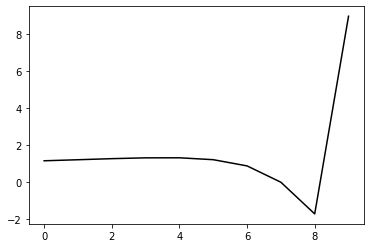

56000 0.2527026481392311
0.36232721545373303 -0.4160306922670723 -0.1461422750179563 -0.10572869362429783
[ 1.15307716  1.17169735  1.26290083  1.31751847  1.31866851  1.21767715
  0.88527265  0.01300493 -1.68223679  8.99435081]


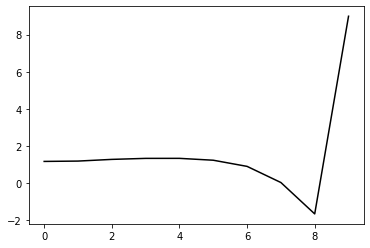

57000 0.19774511686683208
0.35725860098902024 -0.41326445908828696 -0.14970807961878885 -0.10409311370226436
[ 1.12775800e+00  1.17053743e+00  1.25771607e+00  1.32478061e+00
  1.32768483e+00  1.21708020e+00  8.72387604e-01 -5.42491641e-03
 -1.69533752e+00  8.97139636e+00]


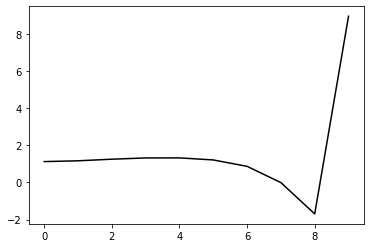

58000 0.1424138517325541
0.3530062446175783 -0.4082872947366245 -0.15021123308851528 -0.10510167038847233
[ 1.13030986  1.16614771  1.23644617  1.30944977  1.33234998  1.24484684
  0.91855245  0.05889671 -1.60485375  8.98222176]


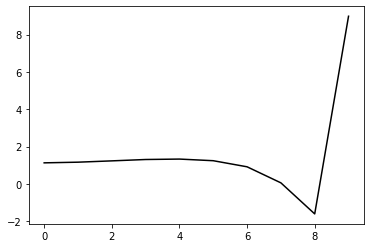

59000 0.13915014112279092
0.3540998560698246 -0.4031183178578226 -0.15009302648794032 -0.10837853880837225
[ 1.12184954  1.21669973  1.27667651  1.30880144  1.30797062  1.21484188
  0.89077322  0.03820392 -1.60461213  9.01161816]


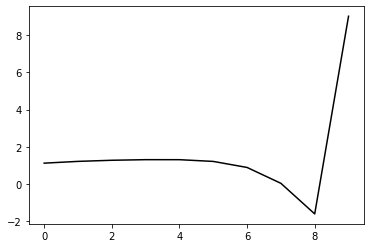

60000 0.1759036293231719
0.3496420296716938 -0.3952637870936418 -0.14918484949142793 -0.10841850195651014
[ 1.10753868  1.13371041  1.1841355   1.2210104   1.21815052  1.12221418
  0.80232052 -0.04246131 -1.6706432   8.98911983]


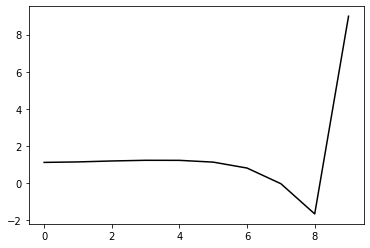

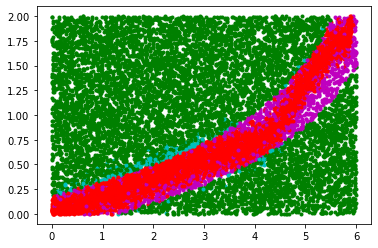

61000 0.18325353202222597
0.3483112985177492 -0.3912718671709296 -0.15041978792983296 -0.11010256415629817
[ 1.10066864  1.16128014  1.19824967  1.22134535  1.20162653  1.08867719
  0.75927764 -0.08388689 -1.69584136  8.96355935]


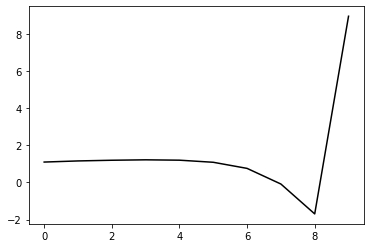

62000 0.15011025162014427
0.35146280516967937 -0.3867232118309201 -0.15173948387254158 -0.1103100445312587
[ 1.09522077  1.18813916  1.25624128  1.2888794   1.27157801  1.15535717
  0.82078492 -0.02223602 -1.62423286  8.99305556]


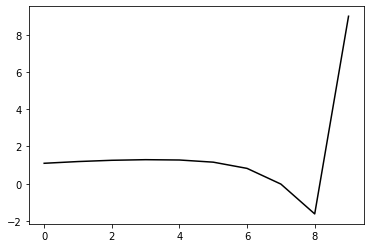

63000 0.1920178737664668
0.3401651589610224 -0.38299263023059715 -0.1519182400133744 -0.10785898292898465
[ 1.08310269  1.01608204  1.07878682  1.1172385   1.10236553  0.98399613
  0.64259075 -0.20403425 -1.79896901  8.98327042]


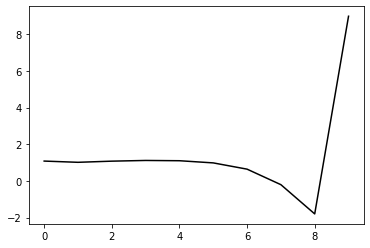

64000 0.16527972710152716
0.3404204182362788 -0.37702403625325764 -0.1530336447765852 -0.10754241338603791
[ 1.11765779  1.18629483  1.25242049  1.30773147  1.31796795  1.22179942
  0.89360682  0.0547731  -1.5289449   8.99652583]


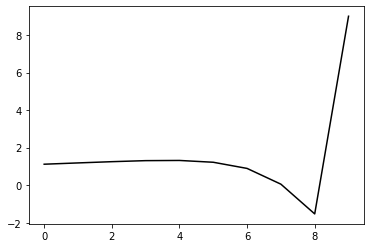

65000 0.2065629627481132
0.3312290231830166 -0.37376232534018106 -0.15353720689517444 -0.10620467867763098
[ 1.1279053   1.1417275   1.19671536  1.24320418  1.25016736  1.15928417
  0.8395376   0.00901037 -1.55857336  8.98714636]


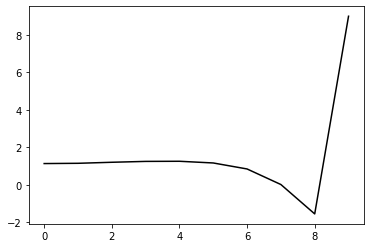

66000 0.1368191274341916
0.3283719114200386 -0.3677118173366255 -0.15329656163798216 -0.10651006369053174
[ 1.1179889   1.15208999  1.21318897  1.25035492  1.24194703  1.13932472
  0.81362479 -0.02019146 -1.582301    8.96809039]


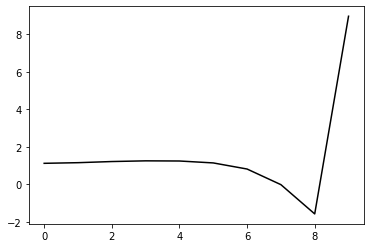

67000 0.17210242193566697
0.33079779709437196 -0.36299970898823236 -0.15356356065414825 -0.10690711495659176
[ 1.16365293  1.14313169  1.22776914  1.29417974  1.30057093  1.19846816
  0.87442929  0.05075443 -1.48559687  8.9903317 ]


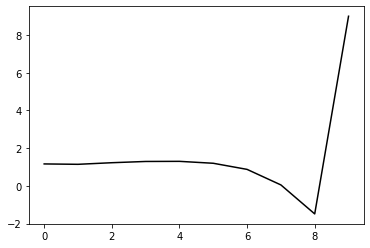

68000 0.16721758574613585
0.3294316425071942 -0.3603112031189616 -0.15587838328308987 -0.10441743642511375
[ 1.08438073  1.07516123  1.13250366  1.17492191  1.16924871  1.0636043
  0.73680324 -0.08455961 -1.60647078  8.98650472]


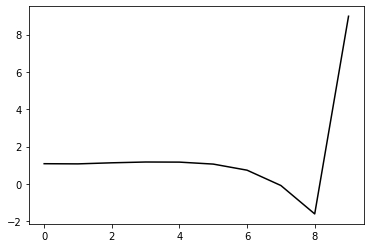

69000 0.2583219573619589
0.3277106977027863 -0.3511152072602673 -0.15388472644336984 -0.10857571220757038
[ 1.12984237  1.15920671  1.21673887  1.24888016  1.23545571  1.12797042
  0.8026355  -0.01439795 -1.52180037  8.98496521]


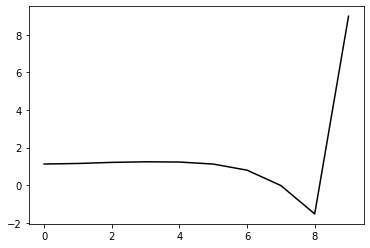

70000 0.1804947444063785
0.3224539371250477 -0.3499014607388274 -0.15648283467186946 -0.11002484628697205
[ 1.09628236  1.11778132  1.16554125  1.19515056  1.1902137   1.09537638
  0.78610999 -0.01132147 -1.48907555  9.00120176]


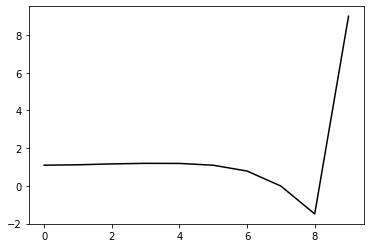

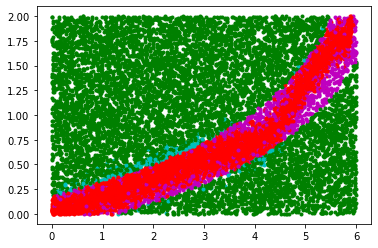

71000 0.16532536847409937
0.31291316976132366 -0.34659640912556633 -0.1570324099921591 -0.10752373520345698
[ 1.09918636  1.01986617  1.04034546  1.0434775   1.0066331   0.88372383
  0.55356868 -0.25837284 -1.74088322  9.00265845]


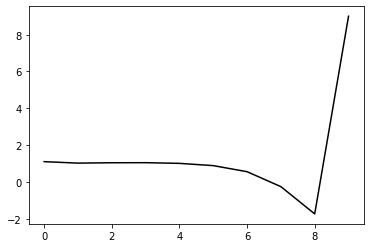

72000 0.13282926941546852
0.31869098446100547 -0.3395053651486917 -0.15730323993877188 -0.10871249019657435
[ 1.12323668  1.15295348  1.19037516  1.20441359  1.17185125  1.04605977
  0.71575962 -0.0885106  -1.55148127  8.99444809]


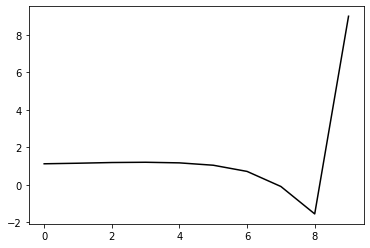

73000 0.23444123612637366
0.31159040925239895 -0.33797678241012563 -0.1585605485098743 -0.11053723501883043
[ 1.11663479  1.07495109  1.12515361  1.15738103  1.13957903  1.02082836
  0.6941119  -0.09942593 -1.53674968  8.98735807]


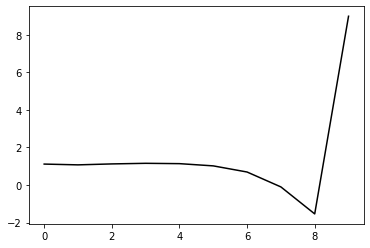

74000 0.2507011343922435
0.3101298787168339 -0.3339642149411755 -0.1594739373809043 -0.11235773205581699
[ 1.06971888  1.08736876  1.15198585  1.19243496  1.18132746  1.06834202
  0.74265862 -0.04905096 -1.47519453  8.97374714]


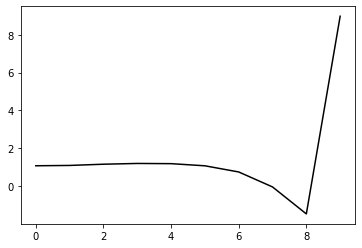

75000 0.16275768685630093
0.30600531450501345 -0.331041256273127 -0.1602824564157931 -0.11423152727932481
[ 1.07340941  1.14251521  1.16442194  1.17631905  1.15736778  1.04671779
  0.72234986 -0.06872863 -1.48490448  8.98299   ]


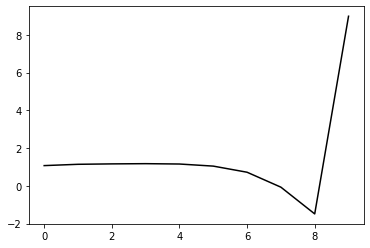

76000 0.22871763290362943
0.3031955026709061 -0.3258277001687574 -0.16099520995274175 -0.11111395521457765
[ 1.05876494  1.00831392  1.03821338  1.04628722  1.01173839  0.8845365
  0.54921181 -0.25013323 -1.66489532  8.98662885]


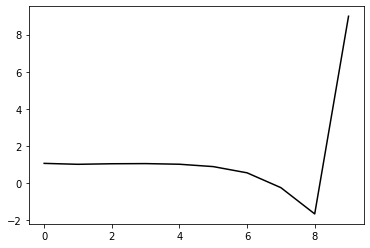

77000 0.1566698760967997
0.3062736925544071 -0.31961233632573965 -0.16071385734287563 -0.11425673758861017
[ 1.08067784  1.06520253  1.10817775  1.11601327  1.07612102  0.9371579
  0.58941382 -0.21791064 -1.62824024  8.98228115]


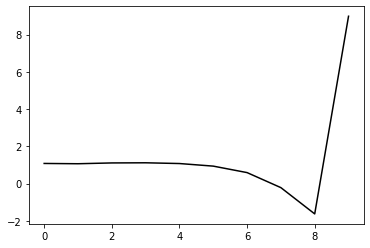

78000 0.25933854620909685
0.31184449687909116 -0.3140934395649458 -0.16173544386148894 -0.11509073166683745
[ 1.12612113  1.16251475  1.23611211  1.26284479  1.23667301  1.10633249
  0.7617867  -0.04269295 -1.4422214   9.00547402]


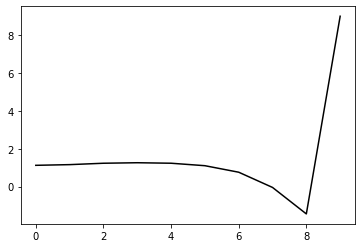

79000 0.1982200841758241
0.3072283287978719 -0.3125410196927911 -0.16314960111097784 -0.11469524523044769
[ 1.10966537  1.16938036  1.22147742  1.23313787  1.18492096  1.02850573
  0.65855736 -0.16628831 -1.57270447  8.98428746]


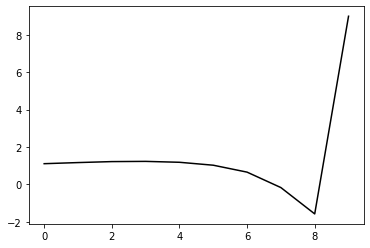

80000 0.2455859440100885
0.3077949954408866 -0.30878275286187457 -0.1628357846386449 -0.1148770118781368
[ 1.12130793  1.13673843  1.19250553  1.21665507  1.18556182  1.03864723
  0.66805997 -0.15968363 -1.55911495  9.01450572]


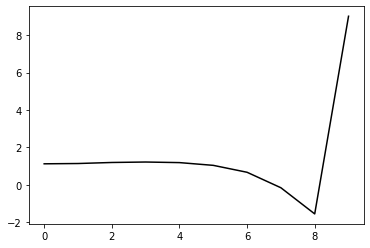

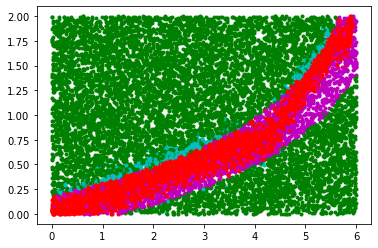

81000 0.2658822746401323
0.30361768083883744 -0.30803868077231783 -0.16389322719557362 -0.11510152164095482
[ 1.10996474  1.1065433   1.15260253  1.18031868  1.15506131  1.01608462
  0.65087722 -0.17191604 -1.55285768  8.98303535]


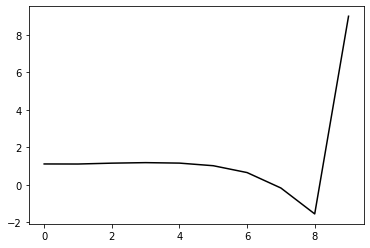

82000 0.19490757788868038
0.2965600702716814 -0.3060579317287482 -0.16511831604836905 -0.11581257455866026
[ 1.10996155  1.1115154   1.14542575  1.17050455  1.1510571   1.02098755
  0.66096314 -0.16384892 -1.54268002  8.99850911]


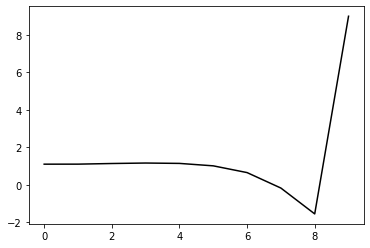

83000 0.24402604425407556
0.30108978660412467 -0.30113825525387955 -0.16490829547397212 -0.11836874588209063
[ 1.08531211  1.11317207  1.18722685  1.21220022  1.17547913  1.03298297
  0.66591532 -0.16679906 -1.54612766  8.96092603]


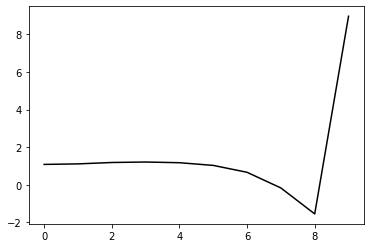

84000 0.2259955029671043
0.3016351487723274 -0.29874433664476724 -0.16647578250129313 -0.11817377983040507
[ 1.08928474  1.10164265  1.16478491  1.1989597   1.17006632  1.02701179
  0.65818478 -0.1756218  -1.54850803  8.99356247]


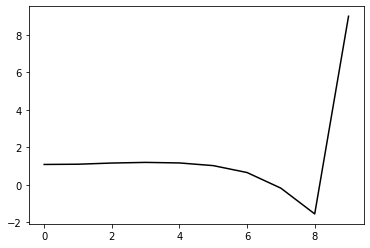

85000 0.23329542354371627
0.29826847975074744 -0.2970462735463634 -0.16674337918304205 -0.11918586457041103
[ 1.11386027  1.10199526  1.15363835  1.17484921  1.14889513  1.01337744
  0.64987028 -0.17793939 -1.534783    8.9853287 ]


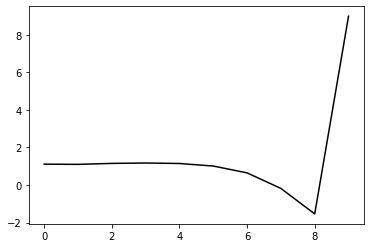

86000 0.18649271456485786
0.29947173456742326 -0.294815013722997 -0.16780379073747473 -0.11957168551349916
[ 1.06825718  1.08710506  1.12501388  1.14223049  1.0976997   0.94359552
  0.56722117 -0.26985764 -1.62610329  8.9791122 ]


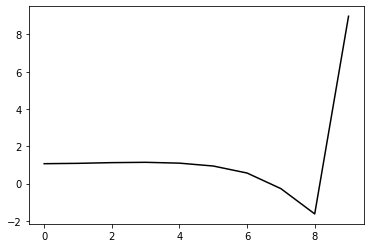

87000 0.1937216000241636
0.29520834216920044 -0.2899315226007971 -0.16794569945079263 -0.11798240182530556
[ 1.09780873  1.07192664  1.12086913  1.15261358  1.12965353  0.99244113
  0.62490415 -0.20907607 -1.56284691  8.98727536]


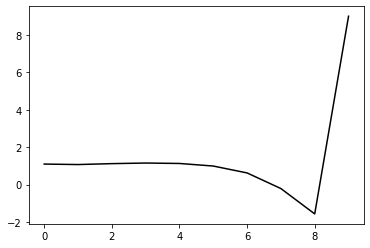

88000 0.15659291023089789
0.29689588052958144 -0.2864619820651253 -0.16951370030771287 -0.11799969031752146
[ 1.05703507  1.10994751  1.16635045  1.18198292  1.14192907  0.99195102
  0.61157311 -0.23806532 -1.60465432  8.98376963]


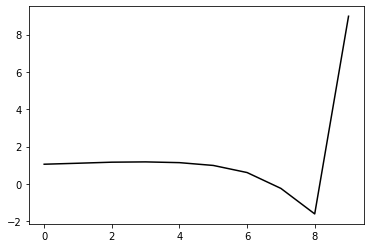

89000 0.16950813159542022
0.29617101931515205 -0.28330486500951046 -0.16983882302474518 -0.11818020972678328
[ 1.07356156  1.14269728  1.17122701  1.18516939  1.152211    1.00807468
  0.63349531 -0.21149806 -1.57100029  8.98884757]


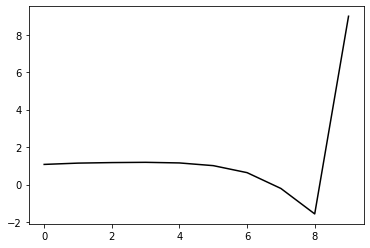

90000 0.24150934707318417
0.2842226951167967 -0.2800882690531378 -0.16812758700958164 -0.11959856856624718
[ 1.10598342  1.02188298  1.02853448  1.04611217  1.02076969  0.88937433
  0.52793018 -0.30799813 -1.66007414  8.96368252]


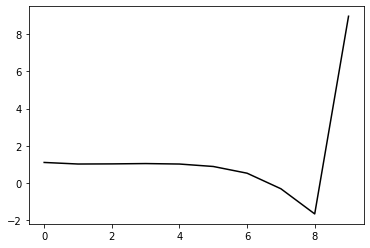

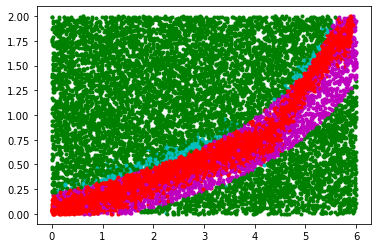

91000 0.20775658260655877
0.2887784009895302 -0.27746158973418017 -0.17091911804812362 -0.12022674902635114
[ 1.10048497  1.09925202  1.1330978   1.15294463  1.12495844  0.99473387
  0.63894666 -0.19132062 -1.53636502  8.97225869]


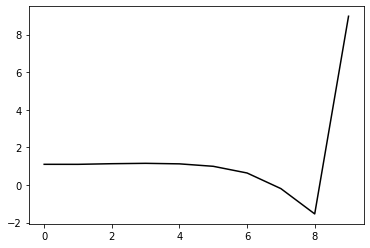

92000 0.17445565944452496
0.2923043754335535 -0.274817558641749 -0.17252000321647906 -0.11930592931206634
[ 1.06888909  1.09530925  1.139507    1.14632659  1.09729742  0.9479698
  0.58050376 -0.25565734 -1.60279305  9.0068065 ]


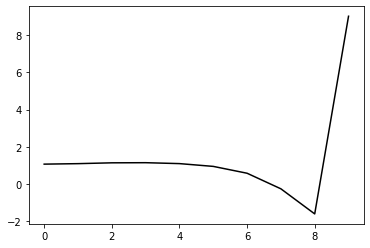

93000 0.18791419479025656
0.2875543355373112 -0.2730916711489067 -0.1735677192533545 -0.11868019924743897
[ 1.09558288  1.0976059   1.1339562   1.14949986  1.11470396  0.96805569
  0.59786025 -0.23888299 -1.5855092   8.98662271]


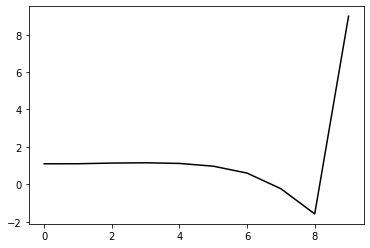

94000 0.19413988526995227
0.28472609379297037 -0.2676859510185385 -0.1723356944197604 -0.11850812991063804
[ 1.0959382   1.06384317  1.08704617  1.09951987  1.07157251  0.93917559
  0.58150387 -0.24352417 -1.57713557  8.99032194]


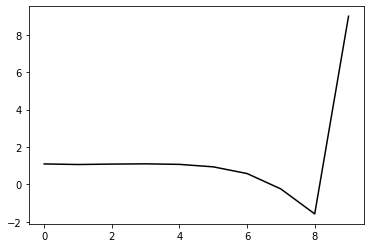

95000 0.25377229067349605
0.2904247984549005 -0.26444952457974835 -0.17264861435580406 -0.12155319179969687
[ 1.11810594  1.10684917  1.17052333  1.18999082  1.14729232  1.00310838
  0.64237111 -0.17992203 -1.50381352  9.0012366 ]


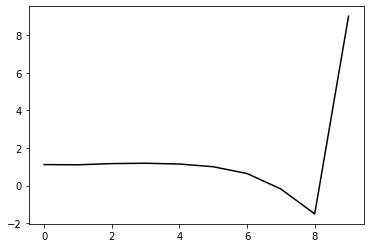

96000 0.15388466374249976
0.288763860093277 -0.2649367416949838 -0.1753955474805386 -0.12360902113652132
[ 1.07993601  1.13176967  1.16116785  1.17245451  1.13150424  0.97853097
  0.6065619  -0.22305928 -1.55148828  8.97207458]


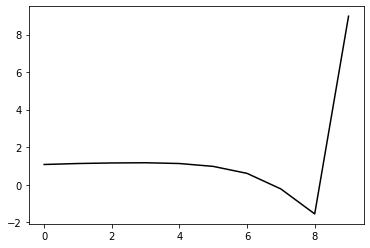

97000 0.19625775830286485
0.2840962210071238 -0.26318840970259055 -0.17624098072531486 -0.1223364880411708
[ 1.10226879  1.10157441  1.14356022  1.15520462  1.10951796  0.95566051
  0.57918679 -0.25605635 -1.5883237   8.98664558]


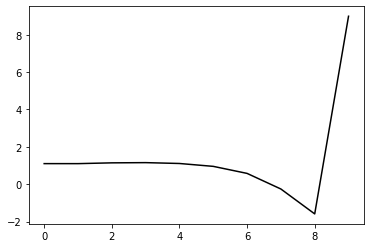

98000 0.18306781571159317
0.28345951582937706 -0.25688797716915424 -0.1748441027382939 -0.12332969295874847
[ 1.08784965  1.11313058  1.11778845  1.10707053  1.04534554  0.87104309
  0.4731015  -0.38258982 -1.73193819  8.97968555]


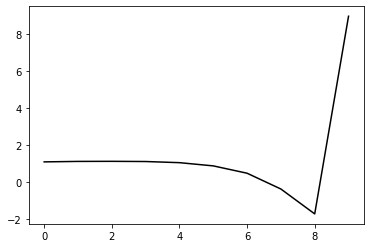

99000 0.16225683814763397
0.28459880890820083 -0.25551471487808247 -0.17729451936180982 -0.12227086758130896
[ 1.07370867  1.15158892  1.19136384  1.20847818  1.15603529  0.97957953
  0.57286434 -0.2937154  -1.65100311  8.97410243]


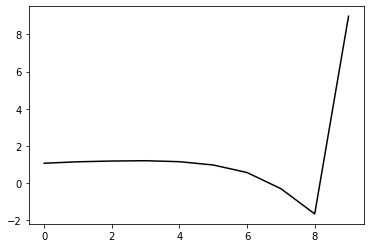

In [35]:
optimizer=tf.optimizers.Adam(learning_rate=0.0005)
for j in range (10000):    
    with tf.GradientTape() as g:
        loss=Error_func(h, m2, lam, alpha, beta, Positive[j%set], Negative[j%set])
        gradients=g.gradient(loss, [h, m2, lam, alpha, beta])
        if np.isnan(loss)==True: break
    for i in range (90):
        optimizer.apply_gradients(zip(gradients, [h]))
        if any(np.isnan(h.numpy()))==True: break
    for i in range (10):
        optimizer.apply_gradients(zip(gradients, [h, m2, lam, alpha, beta]))
        if any(np.isnan(h.numpy()))==True: break
    if j%100==0: 
        print(j*10, Error_func(h, m2, lam, alpha, beta, Positive[np.int32((j/set)%set)], Negative[np.int32((j/set)%set)]).numpy())
        print(m2.numpy(), lam.numpy(), alpha.numpy(), beta.numpy()), print(h.numpy())
        plt.plot(h.numpy(), 'k-'), plt.show()
    if j%1000==0:
        for i in range (set):
            [Positive0[i], Positive1[i]]=NN_func_01(h, m2, lam, alpha, beta, Positive[i])
            [Negative0[i], Negative1[i]]=NN_func_01(h, m2, lam, alpha, beta, Negative[i])
        for i in range (set):
            x_data1[i]=[v[0] for v in Positive0[i]]
            y_data1[i]=[v[1] for v in Positive0[i]]
            x_data2[i]=[v[0] for v in Positive1[i]]
            y_data2[i]=[v[1] for v in Positive1[i]]
            x_data3[i]=[v[0] for v in Negative0[i]]
            y_data3[i]=[v[1] for v in Negative0[i]]
            x_data4[i]=[v[0] for v in Negative1[i]]
            y_data4[i]=[v[1] for v in Negative1[i]]
            plt.plot(x_data4[i], y_data4[i], 'g.')
            plt.plot(x_data2[i], y_data2[i], 'c.')
            plt.plot(x_data1[i], y_data1[i], 'r.')
            plt.plot(x_data3[i], y_data3[i], 'm.')
        plt.show()

0 0.2014383680433098
0.2764583677017549 -0.263292210679853 -0.1876249436373451 -0.12930725847314153
[ 1.15254583  1.0994155   1.16394343  1.19429179  1.14930039  0.97800396
  0.57170531 -0.29467346 -1.64522102  9.00572493]


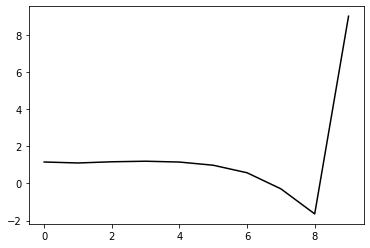

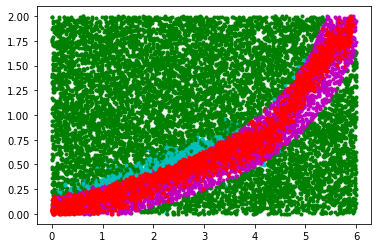

1000 0.18591707392016543
0.30831981083437643 -0.2442614219308273 -0.1852237688506168 -0.1278519620610034
[ 1.12238932  1.14634756  1.19971522  1.209918    1.13759806  0.92783139
  0.48136146 -0.42036975 -1.79844805  8.95938784]


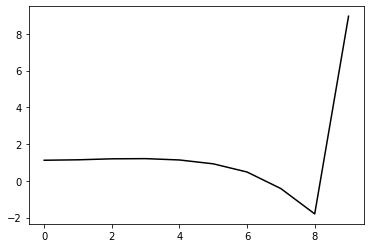

2000 0.2606646583521905
0.30758224278455093 -0.24005690299806506 -0.18390292698203925 -0.12732311870530283
[ 1.12016991  1.12338617  1.1833599   1.19597885  1.14020459  0.95223809
  0.51692638 -0.3813675  -1.75330875  8.97784443]


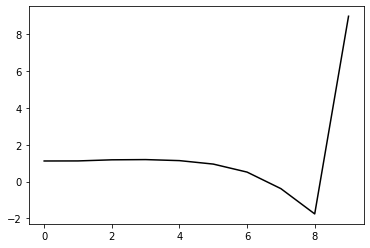

3000 0.20294338928510292
0.3041443204256345 -0.23749237052082575 -0.18380792116819572 -0.12759823106661095
[ 1.09712652  1.1427306   1.20208179  1.21229882  1.14818361  0.95184356
  0.50391393 -0.41530432 -1.80580358  8.96153443]


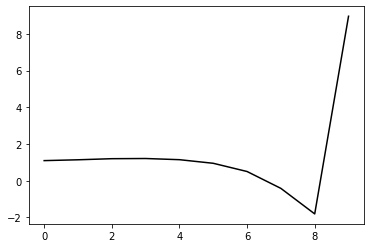

4000 0.12638616411485837
0.3018878583306173 -0.23472938533220786 -0.18317733509544395 -0.1278496579085785
[ 1.05787947  1.12522462  1.14818757  1.1508429   1.09566031  0.91335284
  0.47795216 -0.4362228  -1.82056602  8.97326565]


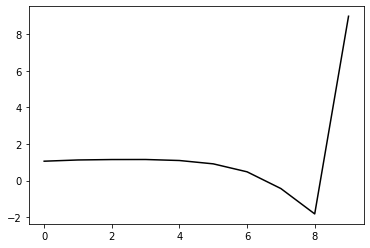

5000 0.19387831842333453
0.2856313932437828 -0.23432571204992017 -0.18229991018084532 -0.12928878239127986
[ 1.10501689  0.98998518  1.01197009  1.01830348  0.96305252  0.78378878
  0.35002507 -0.57245254 -1.9712086   8.96234   ]


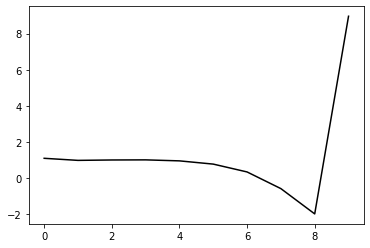

6000 0.24020430153585515
0.2958685586391867 -0.23574479064195716 -0.18710502494304385 -0.12859535062113214
[ 1.05251869  1.07340586  1.11962087  1.1299978   1.07203947  0.89250477
  0.46437421 -0.45289903 -1.8431144   8.94846811]


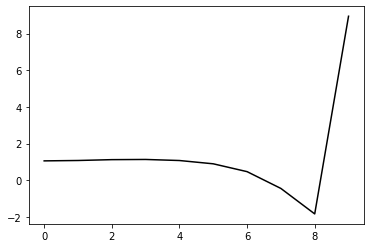

7000 0.20124816674085083
0.28932702919315456 -0.2303351216572102 -0.18484127136808576 -0.12740250377423282
[ 1.09314845  1.05700475  1.09845847  1.11326862  1.06596281  0.89698952
  0.47760123 -0.43710179 -1.83294978  8.97048055]


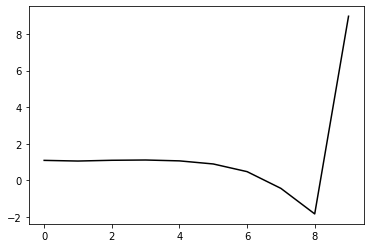

8000 0.21000318011797636
0.28577795397143035 -0.2313413280820128 -0.18597608300133675 -0.12879555634401613
[ 1.0796341   1.00923462  1.02043401  1.03080989  0.99575663  0.84625437
  0.45033367 -0.44085505 -1.81276037  8.94518506]


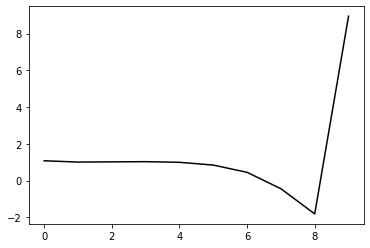

9000 0.18374592511067017
0.28460191821144976 -0.22723292496796774 -0.18511407158490914 -0.1308477204638932
[ 1.06864792  0.995897    1.01110198  1.01606122  0.96997609  0.81883406
  0.43152497 -0.45070122 -1.82032977  8.96280867]


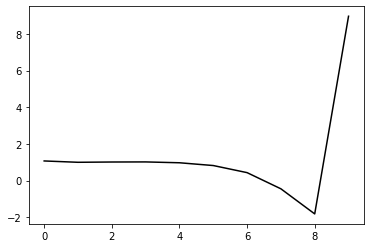

10000 0.19523031333632798
0.28108799864990425 -0.22504719177598198 -0.18646499977165237 -0.12763072490481156
[ 1.07185802  1.01975398  1.04810006  1.04864335  0.99605577  0.83637474
  0.44322015 -0.44437322 -1.82835731  8.9672557 ]


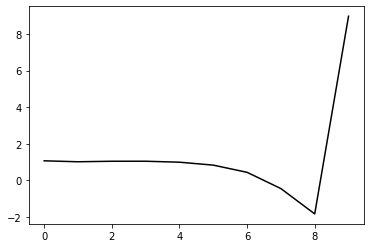

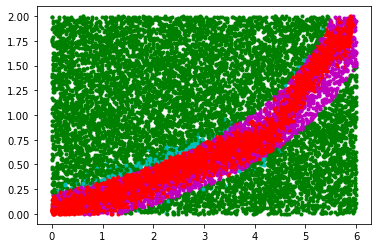

11000 0.20967957354219421
0.26916834922245103 -0.22250634004140193 -0.18440044360623703 -0.12789730879037528
[ 1.10808992  0.99859715  1.00287284  0.99551913  0.93883724  0.77612169
  0.38203664 -0.50366028 -1.89094919  8.9565456 ]


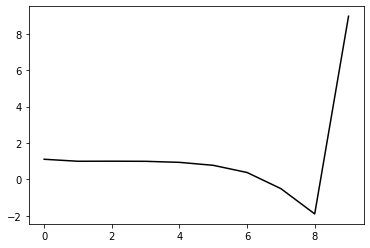

12000 0.1618600151221155
0.2746227004162093 -0.22134796467227472 -0.18718814560286642 -0.12623566794837193
[ 1.06010127  1.0533625   1.08976427  1.07453309  0.99921783  0.81601329
  0.40592509 -0.48923308 -1.88646127  8.96393213]


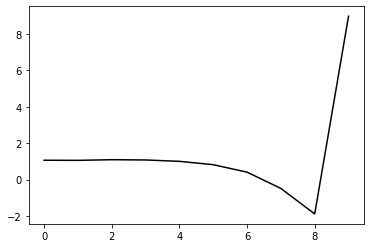

13000 0.1546839852632082
0.27511743691864676 -0.21752585399880367 -0.1877979718592295 -0.12545745070502762
[ 1.07357601  1.08262548  1.12366795  1.13246592  1.07669503  0.90226247
  0.49558255 -0.39393158 -1.78886785  8.96290902]


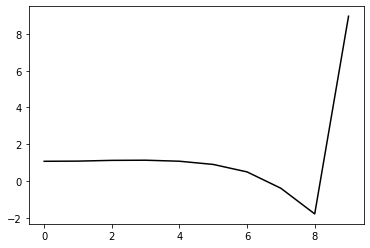

14000 0.18335375681951568
0.27612023241384265 -0.21957445761849428 -0.19091527981824835 -0.12780372889910513
[ 1.05953848  1.09769405  1.13607899  1.13964311  1.08838725  0.92251327
  0.52132367 -0.36043105 -1.74522935  8.99074195]


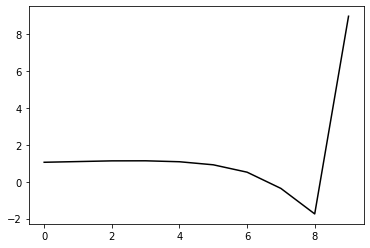

15000 0.19815002445815916
0.2787974310934458 -0.2178037484603016 -0.19246150688662064 -0.12760981319649234
[ 1.09284814  1.10985759  1.18162122  1.21209177  1.17296779  1.01125543
  0.61392328 -0.2636336  -1.64533806  8.98190487]


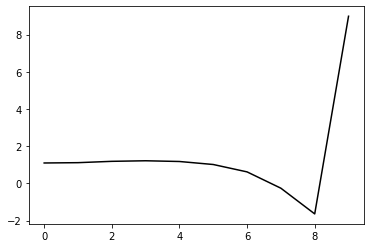

16000 0.16861080741846846
0.27298485683341994 -0.21596031303863736 -0.19195877507974 -0.12529608767271155
[ 1.06030734  0.95156009  0.96575407  0.9586474   0.90127659  0.72984549
  0.32082552 -0.56697275 -1.95514786  8.96255341]


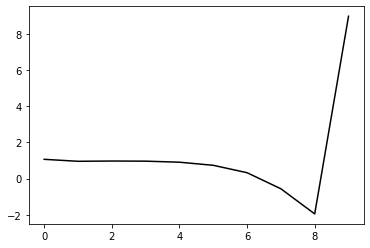

17000 0.17827722337650642
0.2793588937099534 -0.21233568831982774 -0.1919525658123083 -0.13213024836578538
[ 1.07272486  1.20440315  1.23601046  1.22850893  1.1751748   1.01017502
  0.60781258 -0.27585008 -1.66034871  8.97449356]


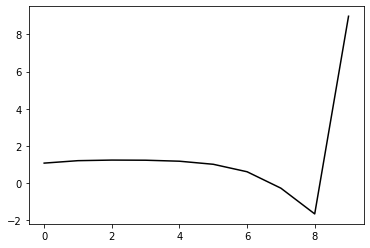

18000 0.20201374973874592
0.2754566743315947 -0.21106317855432613 -0.19198261691290566 -0.12716402107342586
[ 1.0590704   0.99472856  1.0145732   1.00755245  0.93592834  0.75122987
  0.33716021 -0.55255437 -1.93778173  8.96553192]


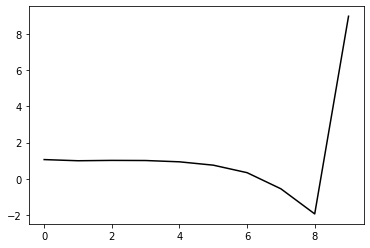

19000 0.2594628311254242
0.27198186661551804 -0.2129333591572065 -0.1948946558725637 -0.12876281904872275
[ 1.08907627  1.07151575  1.08953167  1.09521447  1.04210735  0.86784514
  0.45790136 -0.4284884  -1.81036059  8.91135808]


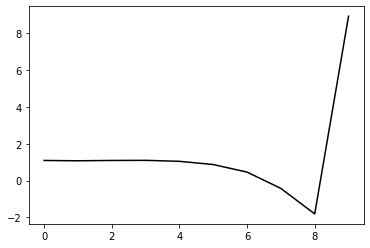

20000 0.19769212611375458
0.2725059207784069 -0.2071800905483558 -0.19262938479733283 -0.12840593522743501
[ 1.08428953  1.09272075  1.13248768  1.13523669  1.07673811  0.90250218
  0.49168155 -0.39647976 -1.7795809   8.97025686]


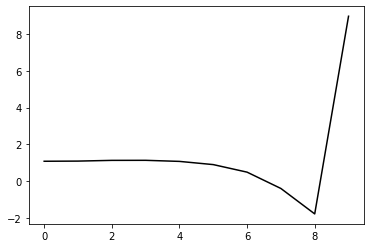

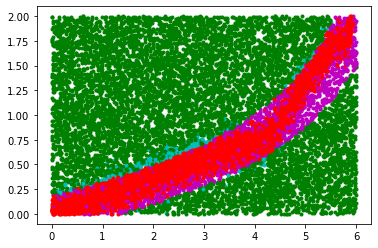

21000 0.15240642674006644
0.2700310373510091 -0.20899294277809347 -0.19387919113230379 -0.1281707925462814
[ 1.06388314  1.00569733  1.02052906  1.00809618  0.9341687   0.74716857
  0.32979442 -0.55833952 -1.93163614  8.9672854 ]


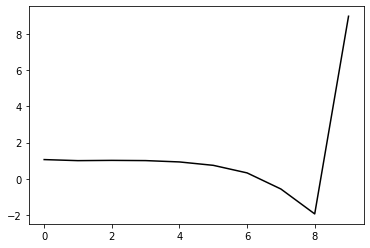

22000 0.2410594067047024
0.2715455827326188 -0.20477292145970172 -0.19285528343218722 -0.13157593639232054
[ 1.0655879   1.01526813  1.03619276  1.02422926  0.94779266  0.75584726
  0.33549572 -0.55108352 -1.91720313  8.98809988]


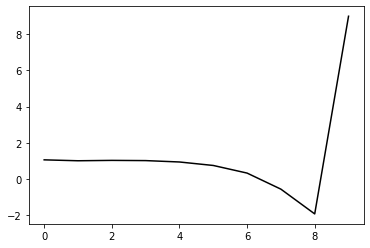

23000 0.2226731877744894
0.268955183551556 -0.20593748224181868 -0.19570634455807792 -0.128775356256705
[ 1.08362492  1.06728714  1.0786155   1.07784468  1.02747594  0.86013437
  0.45692956 -0.41765236 -1.77521035  8.97108877]


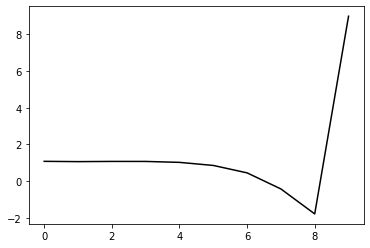

24000 0.13853727065609095
0.2711892696048541 -0.20396595895844055 -0.19654287421113215 -0.13126587652562538
[ 1.07659366  1.1307492   1.15900791  1.15333819  1.09909777  0.93331843
  0.53179356 -0.34507738 -1.70774417  8.97689376]


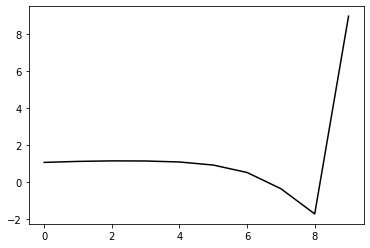

25000 0.17932091513190393
0.27079167596591236 -0.19997324770622996 -0.19587232544441374 -0.12642744065016662
[ 1.08150216  1.10086995  1.14382292  1.14829918  1.08808601  0.91057109
  0.49860065 -0.39015812 -1.76751345  8.97666686]


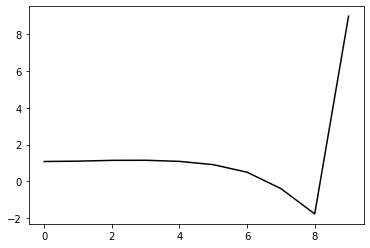

26000 0.19179118278586166
0.2693132033086517 -0.20289133639964455 -0.19891657297597895 -0.1274555028242376
[ 1.11295396  1.1596583   1.20089352  1.21235389  1.16041403  0.9842082
  0.57004492 -0.31867155 -1.69138014  8.99372407]


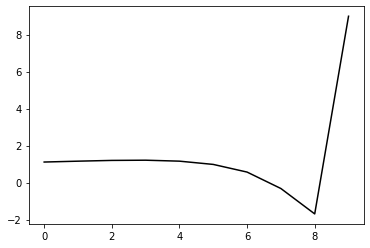

27000 0.2271881841411877
0.2714239353478191 -0.19862767916279997 -0.19689455757587596 -0.12775538254787266
[ 1.08891373  1.13679078  1.17350388  1.17154565  1.10459427  0.91940998
  0.49776831 -0.3963231  -1.77006468  8.96110748]


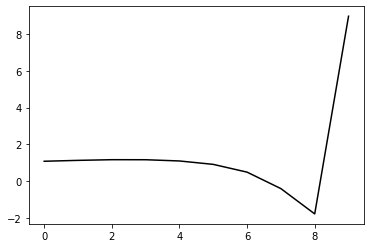

28000 0.27329781662706565
0.26931484159790414 -0.19746776550314302 -0.19739968544169523 -0.12638858904553396
[ 1.06094931  1.06249785  1.09390572  1.09977999  1.04403449  0.86287914
  0.44124484 -0.45320732 -1.8242496   8.94206355]


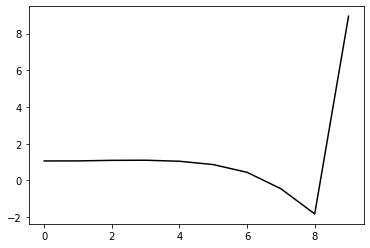

29000 0.2421663751141309
0.26519400013421895 -0.19605874383820696 -0.19729092009711718 -0.12794159918309014
[ 1.11112003  1.13137446  1.14627774  1.13756811  1.07858689  0.90483979
  0.48875609 -0.40546516 -1.77741509  8.9690248 ]


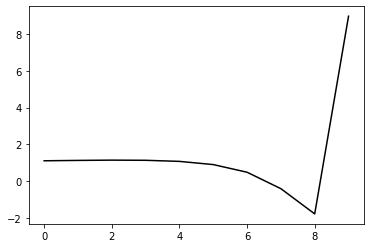

30000 0.14836933137438194
0.2619462457866215 -0.19326072682195006 -0.19768159010133302 -0.12526054218024246
[ 1.11249426  1.09157034  1.14338593  1.16106634  1.10423172  0.921063
  0.49433642 -0.41539233 -1.80828025  8.97138808]


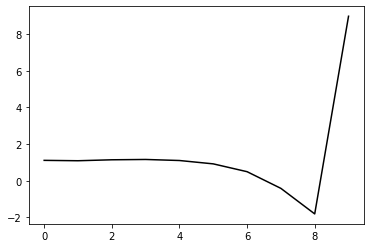

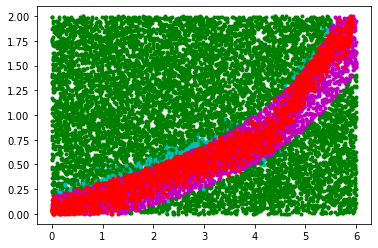

31000 0.209479003714384
0.2584148960238835 -0.19369358183911908 -0.1985043676242947 -0.12733366091444612
[ 1.11426332  1.06149823  1.08984577  1.10676581  1.06942659  0.9076144
  0.49712323 -0.39937138 -1.77845651  8.96342032]


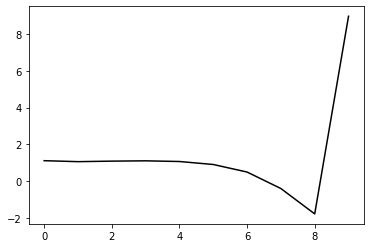

32000 0.2664070649393175
0.25102190874329294 -0.19099650548387345 -0.1956980551131217 -0.12735554684599673
[ 1.11909764  1.03933257  1.06130795  1.06845489  1.00736317  0.82439763
  0.39709747 -0.51716483 -1.91406393  8.9178383 ]


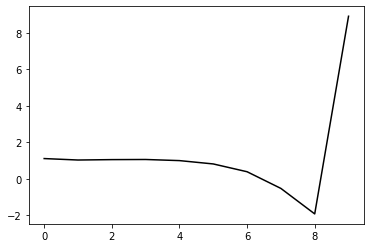

33000 0.16905148960012584
0.26186360224270117 -0.19094638366054628 -0.19966582242941966 -0.12764832589879868
[ 1.0880092   1.16256871  1.23295437  1.24501585  1.18157061  0.99319423
  0.55921072 -0.3623645  -1.76739118  8.97381939]


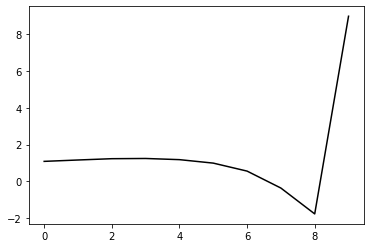

34000 0.20462070430908452
0.262075753710213 -0.19137773195415717 -0.20104410834288378 -0.12525893474031705
[ 1.07134143  1.1166247   1.16779647  1.18515294  1.13094596  0.94554107
  0.51002877 -0.41272565 -1.81605541  8.95104516]


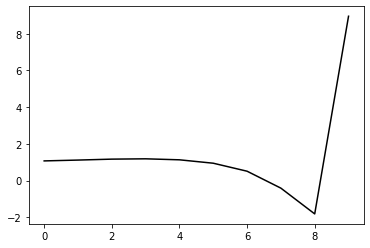

35000 0.23868839758283403
0.25588391574155017 -0.1883148848163751 -0.2002506195591966 -0.11948481412790914
[ 1.07361763  0.98132014  1.012174    1.01170811  0.960476    0.78226093
  0.34587766 -0.58569238 -2.00232914  8.96585236]


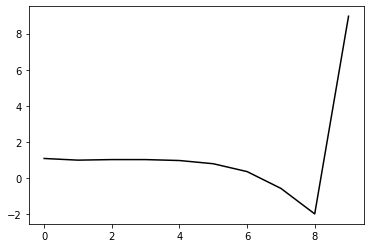

36000 0.22465574378819098
0.2554754249610557 -0.18820099391204467 -0.19985304164680145 -0.12770696368867998
[ 1.10949566  1.08357057  1.13108601  1.13854571  1.08450726  0.9113563
  0.48631009 -0.43508385 -1.83975248  8.99534717]


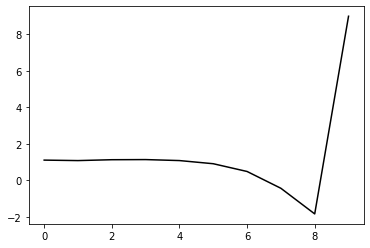

37000 0.18709792195145428
0.2577805206706318 -0.18836759421264052 -0.2019912886737051 -0.1264629825609064
[ 1.08222192  1.10406311  1.14107278  1.15314371  1.10679161  0.9377843
  0.51953414 -0.39576304 -1.79590597  8.95529978]


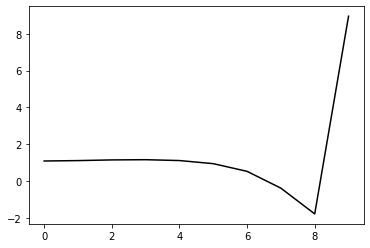

38000 0.22721708364362084
0.2592332795411743 -0.18774043572910595 -0.20300286026412548 -0.12821350294546677
[ 1.10337118  1.19629026  1.2215112   1.21878392  1.16503764  0.99010552
  0.56700498 -0.35311562 -1.76041345  8.95865274]


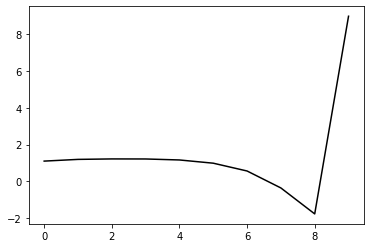

39000 0.16939663946713068
0.25825147815721544 -0.18856653541080048 -0.2037746457268187 -0.1283075701445199
[ 1.09486405  1.1327769   1.15456907  1.15539137  1.09019072  0.89788351
  0.46212078 -0.46381894 -1.87281303  8.97485702]


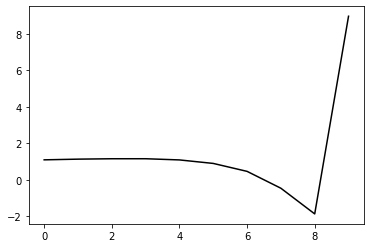

40000 0.17585054710780015
0.25448898093575495 -0.18628861542545935 -0.2024693874334554 -0.12812754808007087
[ 1.11712866  1.07562402  1.11647913  1.13205619  1.08657799  0.91140461
  0.48515088 -0.43359389 -1.83737576  8.96732631]


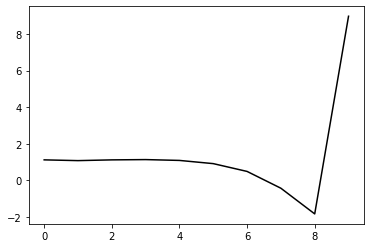

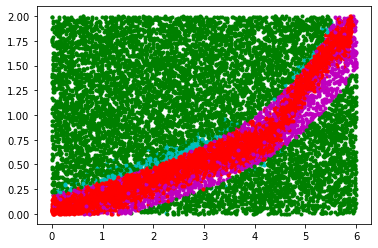

41000 0.23988764282981936
0.25617683008317366 -0.183080718717847 -0.2022045973278588 -0.12608832506266415
[ 1.11154433  1.09243005  1.12647665  1.13909136  1.09158584  0.92149317
  0.5001231  -0.41681129 -1.82083502  8.95339883]


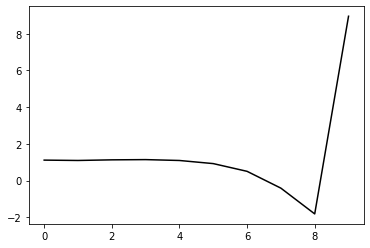

42000 0.21317996099172432
0.2531949115768393 -0.18533708155085415 -0.20369706713894045 -0.12891665988125767
[ 1.08985917  1.02416169  1.05861207  1.0528024   0.99039832  0.81224286
  0.38901827 -0.52799447 -1.93036375  8.98734123]


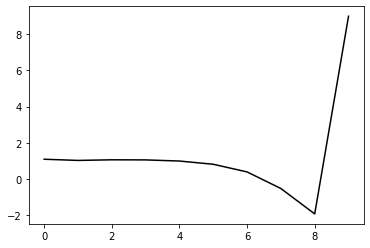

43000 0.1843656135922793
0.2543691048400953 -0.18250956102955657 -0.20350510234935312 -0.13094853432981346
[ 1.09079412  1.15421613  1.17043964  1.17182004  1.12069488  0.94740496
  0.528179   -0.38663239 -1.79214323  8.98274019]


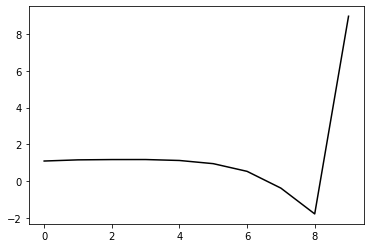

44000 0.21387159522082744
0.25362418463342873 -0.1801931076115546 -0.20282411577901718 -0.1302241165987886
[ 1.07615364  1.1144751   1.10830118  1.09951928  1.04863334  0.88115314
  0.46842447 -0.44094325 -1.84600527  8.96938485]


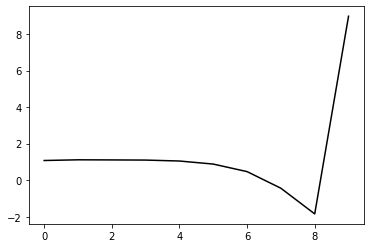

45000 0.26254133114601913
0.253199622389965 -0.18176582785831566 -0.20423661158992326 -0.13243518706328186
[ 1.08638509  1.11513649  1.16177831  1.17542256  1.12330129  0.95270107
  0.5427243  -0.35943774 -1.75534827  8.9809953 ]


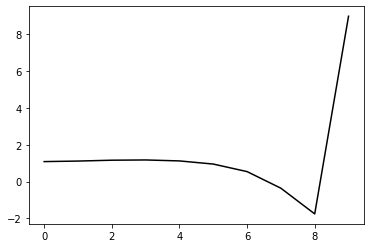

46000 0.22327737679397014
0.2521895053201402 -0.1801984016677877 -0.2033089810040247 -0.1338212300411637
[ 1.05060614  1.00565632  1.02288316  1.00434718  0.9290484   0.74224714
  0.32168243 -0.58264987 -1.9750074   8.96199878]


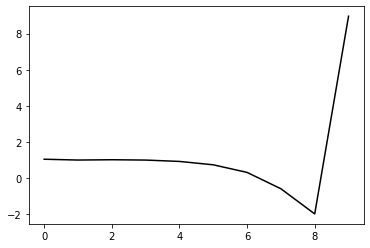

47000 0.15488361602489856
0.25009209639940316 -0.18037212425545815 -0.2037073134124895 -0.13525081373939785
[ 1.08105109  1.04125142  1.06869928  1.07049884  1.01201623  0.83648223
  0.42540306 -0.46891058 -1.85326783  8.90103903]


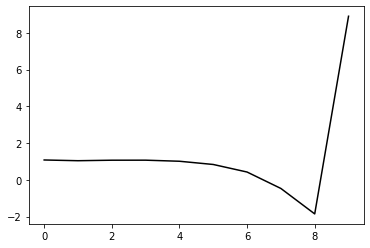

48000 0.212301578109602
0.25194005321931046 -0.18110890166547666 -0.20549056141552163 -0.13510436093003605
[ 1.07001107  1.12683933  1.14099596  1.1339296   1.07169584  0.89136572
  0.4740192  -0.42533993 -1.81470311  8.96931319]


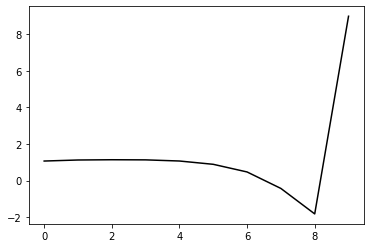

49000 0.25412388289960797
0.2530485121216374 -0.17630433221563863 -0.20353962598304423 -0.13506694597721897
[ 1.07452757  1.12955861  1.16989145  1.1685855   1.10558251  0.9215623
  0.49846851 -0.40623955 -1.8011435   8.99166952]


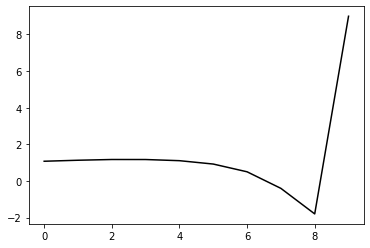

50000 0.1421248004596438
0.25125644361545557 -0.17469785990833528 -0.20396063380186097 -0.13212137878910032
[ 1.08813181  1.03160211  1.05156995  1.06706172  1.03275579  0.8775847
  0.47641853 -0.41117203 -1.79131874  8.96988354]


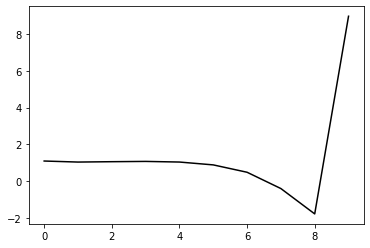

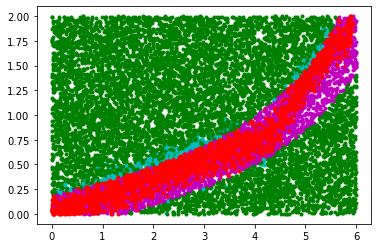

51000 0.2412107216037682
0.24273081012270625 -0.1877407420425015 -0.21214298828902695 -0.12964188550171893
[ 1.08245722  0.92880945  0.93601022  0.9404466   0.90467701  0.761942
  0.37721089 -0.49762075 -1.86691771  8.93495691]


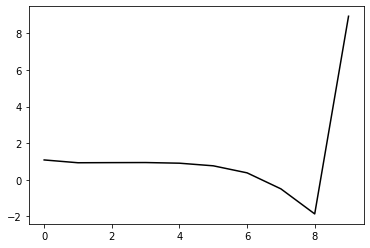

52000 0.17163694716089145
0.2535301416292988 -0.17351424397724774 -0.20510218605474653 -0.13142686611620907
[ 1.07933777  1.05160377  1.03820253  1.02311329  0.97390688  0.82575251
  0.44455016 -0.42711821 -1.79768493  8.95973537]


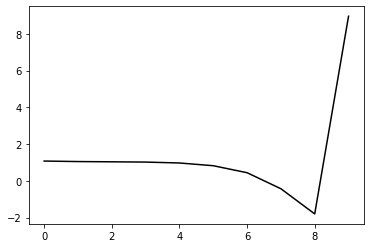

53000 0.17837596801181055
0.25123937156514714 -0.17409780976811112 -0.20642132922567466 -0.13014135192827367
[ 1.10093307  1.06483809  1.06041238  1.03776869  0.96769675  0.80055754
  0.41175824 -0.46065518 -1.83183455  8.99716013]


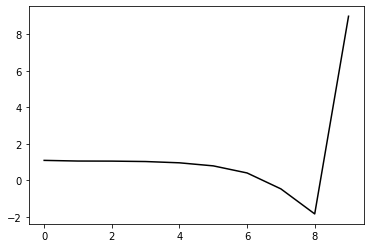

54000 0.1733971788642203
0.2566558698263819 -0.17006584598451974 -0.204565749132451 -0.13176772043040638
[ 1.08685331  1.16749293  1.1742384   1.13182092  1.02452964  0.81759959
  0.39982888 -0.48760324 -1.86817204  8.95204089]


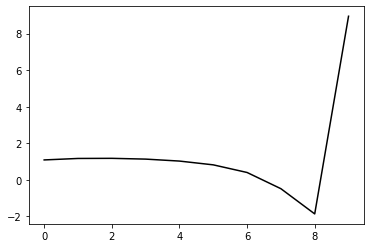

55000 0.22401102530359185
0.2548107569310976 -0.17591008202483513 -0.20913107917008564 -0.1313947447545458
[ 1.04840312  1.00398013  1.04093547  1.04230146  0.96901705  0.76694116
  0.34040704 -0.54595657 -1.91854244  8.98062288]


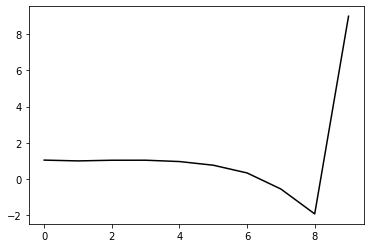

56000 0.22577822576214834
0.2551921927131261 -0.17376599100386653 -0.2087132520786544 -0.13340494063500605
[ 1.07179732  1.10165523  1.11269997  1.10284779  1.03744101  0.84715313
  0.41934222 -0.4699957  -1.8395945   8.95704007]


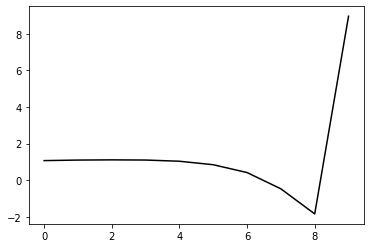

57000 0.2310393089959799
0.24942284581990207 -0.18169879578297995 -0.21360232308007854 -0.13092123645965165
[ 1.09731826  1.0292841   1.03369335  1.01690212  0.93805937  0.73573647
  0.2944251  -0.61092132 -1.99110626  8.95567585]


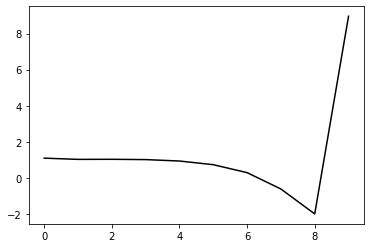

58000 0.14300398573852655
0.2547031369337728 -0.1712103762706439 -0.20849673840612587 -0.13106493650144677
[ 1.09677852  1.11999445  1.15985548  1.15241901  1.07503745  0.86841338
  0.41769191 -0.50254567 -1.89696652  8.95854913]


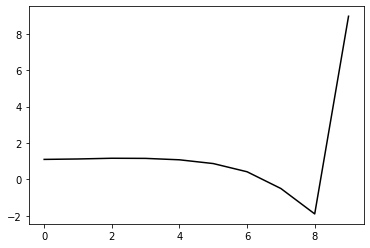

59000 0.15209092841869745
0.2502977985655891 -0.1730887548256323 -0.21035240243403044 -0.130613613488642
[ 1.09490956  1.07615624  1.11754668  1.13693311  1.09214515  0.91510321
  0.48664845 -0.4185184  -1.79710712  8.98037656]


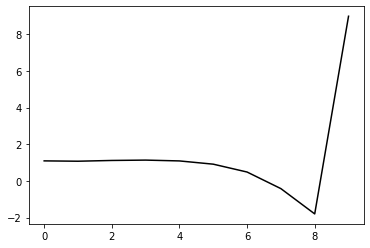

60000 0.17107923576931788
0.2567852657138915 -0.1732414215969924 -0.21055309336090924 -0.13395373626354298
[ 1.09080292  1.16706492  1.21270043  1.20267268  1.12323636  0.92168866
  0.47777254 -0.43939673 -1.82069635  8.96633492]


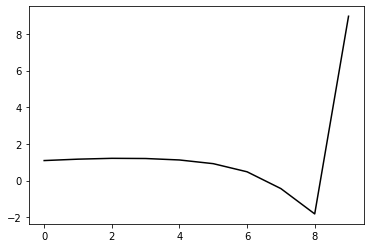

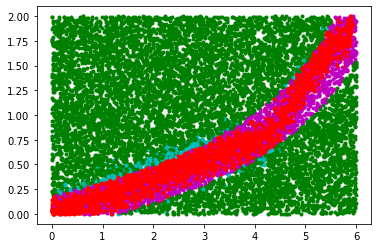

61000 0.1969823013420868
0.2556345511079817 -0.1687702067545744 -0.20816791659697143 -0.13553231691250087
[ 1.10474061  1.15959253  1.19748282  1.19843646  1.12811816  0.9242827
  0.47208441 -0.45803246 -1.8548656   8.98732836]


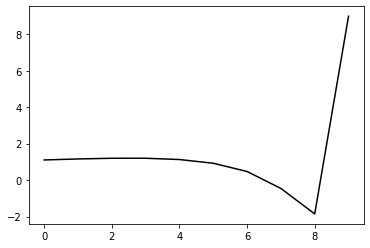

62000 0.15911146848430432
0.25763079315766807 -0.16921625085265266 -0.20854638476771248 -0.1345178680062692
[ 1.07846251  1.0941151   1.13234831  1.13550252  1.06530784  0.8598296
  0.40436844 -0.52790338 -1.91952284  8.92015383]


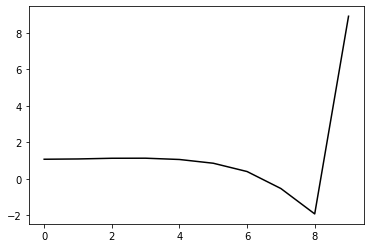

63000 0.17846948231049967
0.25668909844270477 -0.1710028536426943 -0.20966035047991968 -0.13689822182728695
[ 1.07589044  1.11518156  1.16115953  1.16081429  1.09268752  0.89906213
  0.45401055 -0.4707622  -1.8506806   9.0029715 ]


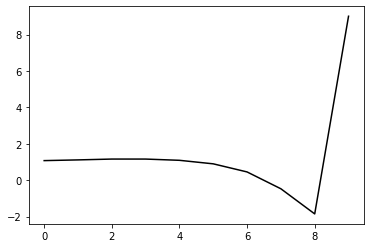

64000 0.1955679955410989
0.24983344737172233 -0.17326164503645683 -0.2107170914021272 -0.13645522933004645
[ 1.09570852  1.08162999  1.10619265  1.11048283  1.04811421  0.8555865
  0.41133645 -0.51634843 -1.90024436  8.96052976]


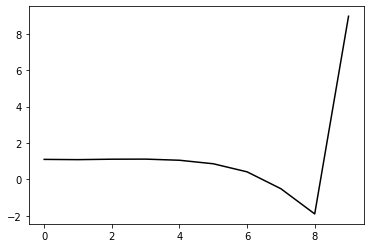

65000 0.22151429515459248
0.24898995396865858 -0.17065381318087453 -0.20978647516635324 -0.13637123740878446
[ 1.09894474  1.0371584   1.09044908  1.1011209   1.03380238  0.83716463
  0.39012917 -0.5419649  -1.92996152  8.96080029]


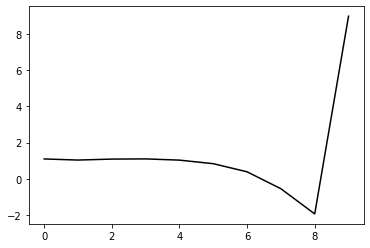

66000 0.14921480560567355
0.25211852609722907 -0.16837007440230808 -0.20952161959942725 -0.13671746456206632
[ 1.07889078  1.1095642   1.13518556  1.13179748  1.06520251  0.86792935
  0.41760505 -0.51870675 -1.9087483   8.92508401]


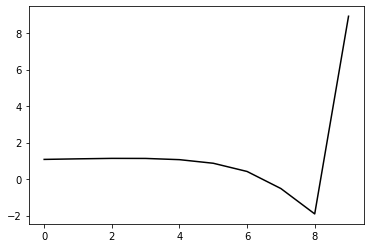

67000 0.1695894701013388
0.2580274882354857 -0.16665571623848036 -0.2105576193833836 -0.13577430517722042
[ 1.09843549  1.13115211  1.18251298  1.18520806  1.11168052  0.90424656
  0.4424368  -0.50827073 -1.91511682  8.95380765]


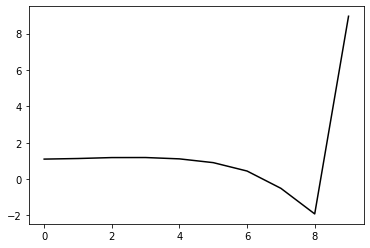

68000 0.12496674207557701
0.2619229265142923 -0.1659699591027465 -0.2118872251654887 -0.13361453348815572
[ 1.08895903  1.14055826  1.17150935  1.16498397  1.09145044  0.8808507
  0.41028675 -0.55323447 -1.97555152  8.97037032]


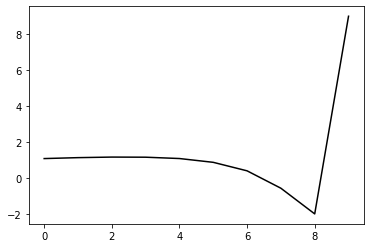

69000 0.2627564987585302
0.25954070082587216 -0.16575776729965916 -0.2122299132426844 -0.13324299749206536
[ 1.08133694  1.16811932  1.18388839  1.16974567  1.09702579  0.89064894
  0.42155008 -0.54550814 -1.97415318  8.93900975]


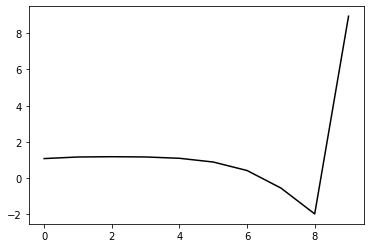

70000 0.1862857585950724
0.2602405758570061 -0.16825907717760946 -0.21364975125435604 -0.13324520871719372
[ 1.1013848   1.17126668  1.20770145  1.20828999  1.14083779  0.93471458
  0.46572995 -0.50333118 -1.93384928  8.96460487]


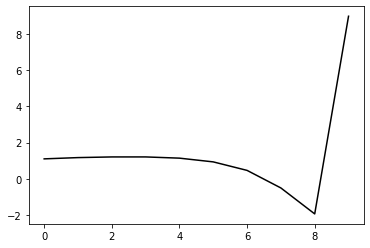

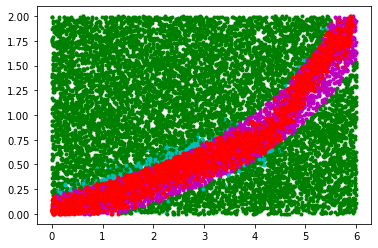

71000 0.15185055775580558
0.25618721612731454 -0.16789127898859602 -0.2131689404064959 -0.13225223481623305
[ 1.07798508  1.09945097  1.14077992  1.14724752  1.08318811  0.88246352
  0.41667141 -0.55360937 -1.98925059  8.94266209]


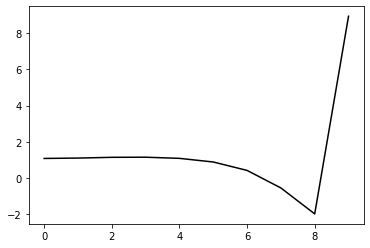

72000 0.11394001653696836
0.2539178965292831 -0.1679522351768424 -0.21395407013189033 -0.1324579410744333
[ 1.09415452  1.12313532  1.15125752  1.14951795  1.08260525  0.88346168
  0.41925303 -0.55397309 -1.99801519  8.90842188]


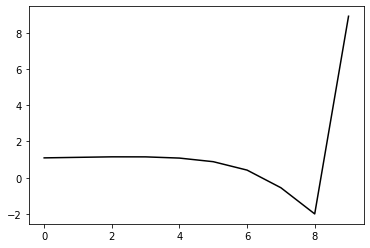

73000 0.2213708544352094
0.2526658893706747 -0.16774905902342693 -0.21485133633355283 -0.13194184684594681
[ 1.10714329  1.11592395  1.15601555  1.16498472  1.1036809   0.91015129
  0.45174306 -0.52121648 -1.9734072   8.95949662]


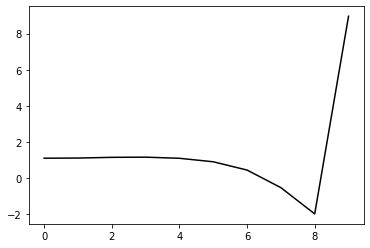

74000 0.266915813153113
0.25153391290359955 -0.16565587100876702 -0.21424397630778624 -0.13106577763307795
[ 1.12816609  1.07593077  1.11377295  1.13408148  1.08820912  0.90466145
  0.45305083 -0.51764401 -1.97567368  8.95719055]


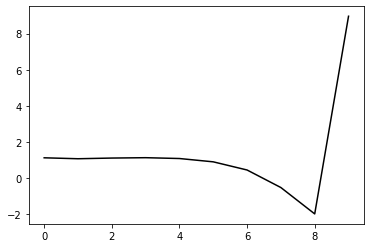

75000 0.22379373999354654
0.24675378667902298 -0.16126790221172888 -0.21219723289283401 -0.13021737775731929
[ 1.12693377  1.08058677  1.12246926  1.14743236  1.11024666  0.93977442
  0.49866555 -0.46843752 -1.93369215  8.89209395]


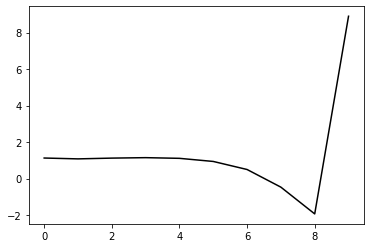

76000 0.22971913546615647
0.23960869558391354 -0.1637229050710864 -0.21303071974188964 -0.13005079651278825
[ 1.12539905  1.04904893  1.08443796  1.11076826  1.08466826  0.93577378
  0.5179274  -0.43365875 -1.89633196  8.95211532]


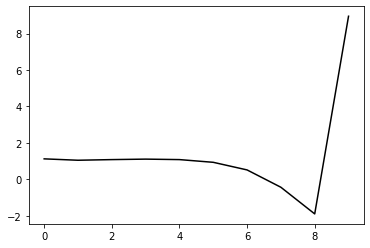

77000 0.1985653439873154
0.24225736053106794 -0.17004128886864084 -0.2192831674371093 -0.1253389372708477
[ 1.06634975  1.08477896  1.12905776  1.1454036   1.1047793   0.94822403
  0.53359311 -0.41291742 -1.87614189  8.97202122]


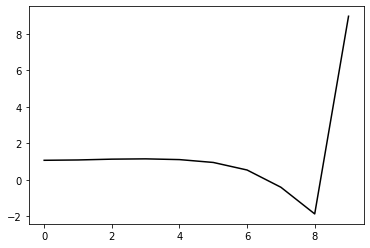

78000 0.2249559785711455
0.23932913222235394 -0.15917668066575222 -0.21119467460812083 -0.1300866488998104
[ 1.10947059  1.11676216  1.16211501  1.16661292  1.11265439  0.93926115
  0.51189253 -0.44491989 -1.92838498  8.95430508]


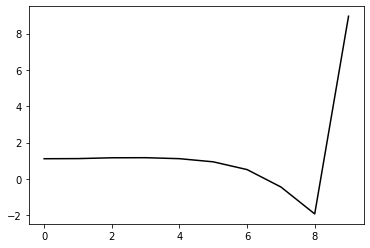

79000 0.1950240630579809
0.2440275846577474 -0.15829398446287488 -0.21213585285359113 -0.13030334267983662
[ 1.10357336  1.18537691  1.24586417  1.26559086  1.21640414  1.04138876
  0.61374365 -0.33797497 -1.82045502  8.96317326]


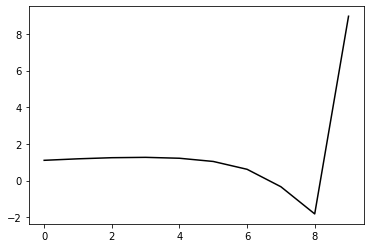

80000 0.2626309215950925
0.24067231437117984 -0.16094214739954285 -0.21278084759158175 -0.13000631397457166
[ 1.12448258  1.04618054  1.08960639  1.11241362  1.07166131  0.90798502
  0.49205557 -0.44209123 -1.90612383  8.95956226]


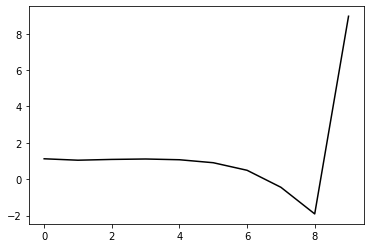

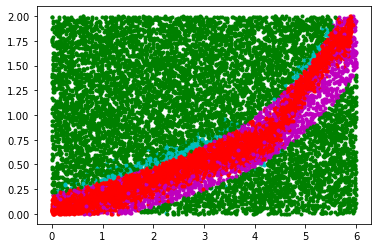

81000 0.2376652917847855
0.24206350391581952 -0.1609677314416229 -0.21405267304936781 -0.12821797627789236
[ 1.1058859   1.09667001  1.10482481  1.10737848  1.06785824  0.91420185
  0.50946003 -0.41301182 -1.86989244  8.91611519]


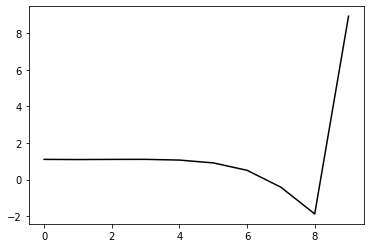

82000 0.1840274146795173
0.23150395400040447 -0.16913970431273156 -0.2174571079372557 -0.1308080257029341
[ 1.09652164  1.00586214  1.03830358  1.03802602  0.99317007  0.84263081
  0.44866466 -0.46078303 -1.90774867  8.95165455]


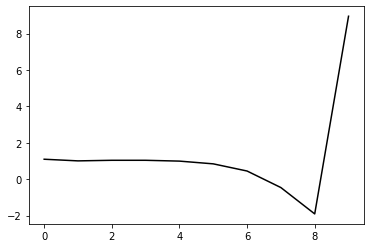

83000 0.30904293046346054
0.24136892100783086 -0.15890483753332763 -0.21177405771861693 -0.1338953479901392
[ 1.12043862  1.13026061  1.17239753  1.17051308  1.11304476  0.94753541
  0.54823045 -0.35670582 -1.79803958  8.96190942]


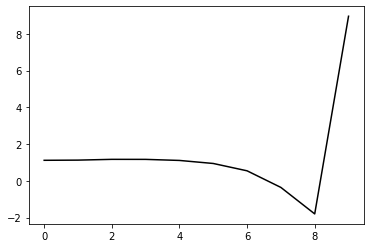

84000 0.25448722370442806
0.24380213702915518 -0.15836259219932664 -0.21258986513293063 -0.13277280664889293
[ 1.10662326  1.14064503  1.15624425  1.14639828  1.08441124  0.90991686
  0.50418693 -0.39737575 -1.83225512  8.98909304]


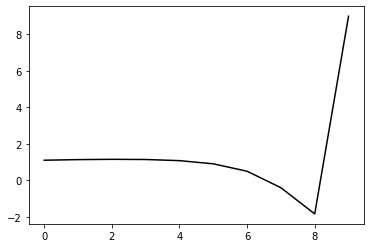

85000 0.22828678001381425
0.23968245807508431 -0.15897107256867513 -0.21265379558199637 -0.13248046195839078
[ 1.10147313  1.07664272  1.11790982  1.11789549  1.04882343  0.86238464
  0.44371537 -0.46495598 -1.90454253  8.97278434]


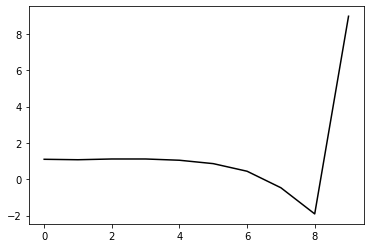

86000 0.17916422492320394
0.24155139764319494 -0.1605123607069143 -0.21330793795261974 -0.1351141155968151
[ 1.07327118  1.12612348  1.16564011  1.15478581  1.08877282  0.90920966
  0.49622363 -0.40064637 -1.82154062  8.96908878]


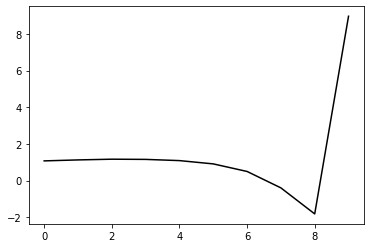

87000 0.2070801411811124
0.23572308792702112 -0.16147863372599397 -0.2128875461367638 -0.13323083888875997
[ 1.06675635  1.03187985  1.04882703  1.03881023  0.9724942   0.78757118
  0.36824662 -0.53187212 -1.95180727  8.94999541]


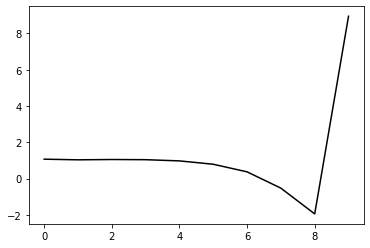

88000 0.16734886096919357
0.23301773687085495 -0.16177545565000861 -0.21379176841057385 -0.13374612241748962
[ 1.09441298  1.07169359  1.08918624  1.07980083  1.02122994  0.84702275
  0.435316   -0.45787016 -1.86784801  8.97393915]


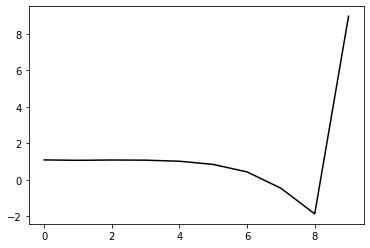

89000 0.1972795018863983
0.23545458605905134 -0.15892512657954022 -0.21349549545206403 -0.13145554756006395
[ 1.09939163  1.0570811   1.08431327  1.07906515  1.01997852  0.84836145
  0.44137831 -0.44690386 -1.84885663  8.99112143]


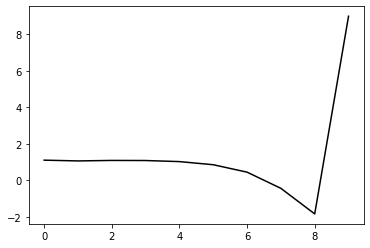

90000 0.22314241339186505
0.22871639857965992 -0.16613961887504766 -0.21677256141549595 -0.1298791612934861
[ 1.06785879  0.93669124  0.94450293  0.92802859  0.85617266  0.67487491
  0.26233793 -0.62859381 -2.02891944  8.94074006]


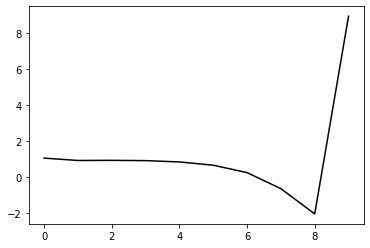

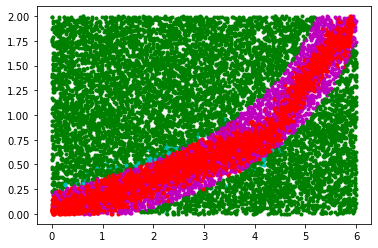

91000 0.19911891208668872
0.23640671496013638 -0.15877358807881517 -0.2144769791832401 -0.13190592694934092
[ 1.06169707  0.95448091  0.95781175  0.93817188  0.87012138  0.69036745
  0.277891   -0.6130177  -2.01208309  8.96022044]


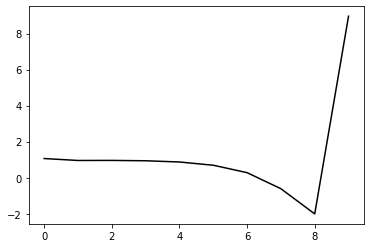

92000 0.1931241485914772
0.24036060320901637 -0.15741355512572563 -0.21521131885517958 -0.13330617059642064
[ 1.08649686  1.13290254  1.14926178  1.13435239  1.07089598  0.89559088
  0.48857105 -0.39523028 -1.78418925  9.00498563]


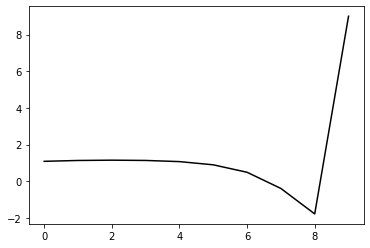

93000 0.19084161673159342
0.24342441696808906 -0.15742843013358443 -0.2152821266436732 -0.13525006015469399
[ 1.08168117  1.16001666  1.212316    1.21062793  1.13820085  0.95039158
  0.53544809 -0.34862904 -1.72772047  8.97542903]


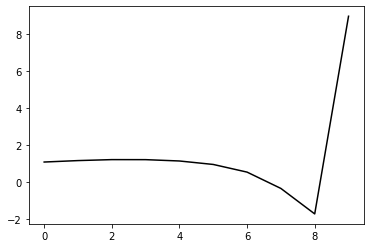

94000 0.1916853466869661
0.23937204420395466 -0.15796269557964993 -0.21515659147966848 -0.13306710540278682
[ 1.10579095  1.04970808  1.07118313  1.06073024  0.99551898  0.81318875
  0.39898714 -0.48144774 -1.84943884  8.97612512]


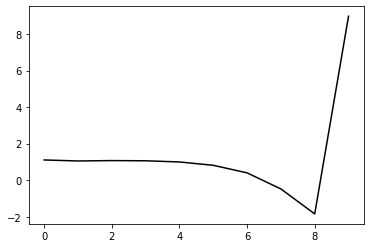

95000 0.23749172666606705
0.2373529233227337 -0.15581961462137026 -0.213778501883391 -0.13332836242416718
[ 1.11401922  1.10316242  1.14188085  1.13488427  1.06310696  0.87389415
  0.45212212 -0.43559397 -1.80588376  8.96328047]


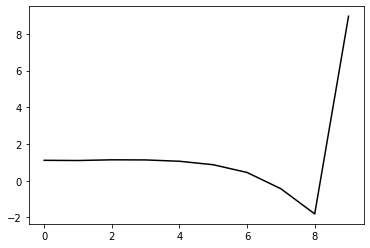

96000 0.16811508655910373
0.2384108589915963 -0.15893363292331616 -0.21608595557753582 -0.13246312943826458
[ 1.11721378  1.07361191  1.11350534  1.10994736  1.03469916  0.83796404
  0.4091741  -0.48229601 -1.84852742  8.95934348]


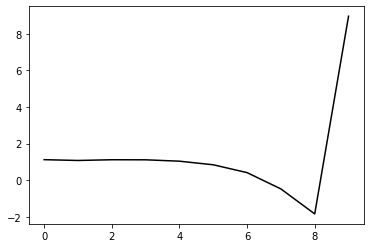

97000 0.1914264160429224
0.23628516137553404 -0.15847757368167614 -0.21516302765959328 -0.1347822697724755
[ 1.08951413  1.05075534  1.0935674   1.10822384  1.04276469  0.84661688
  0.41330628 -0.48128319 -1.8421484   8.9601421 ]


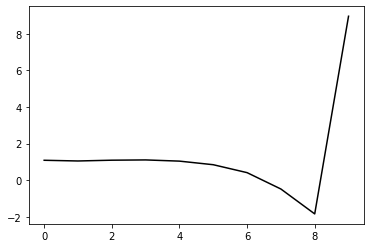

98000 0.17672722968553223
0.23982552560708537 -0.16065247265616267 -0.21708987465388216 -0.1369417452601078
[ 1.07633328  1.13729459  1.16548887  1.15076433  1.0762131   0.87600062
  0.43322588 -0.47301826 -1.83930805  8.96286992]


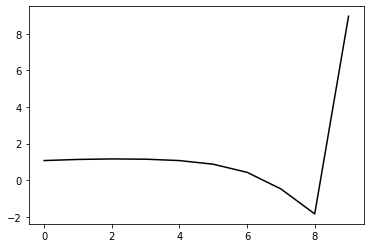

99000 0.17480815108793601
0.24579944954262936 -0.15309270461764946 -0.21468953062637486 -0.1337047985359326
[ 1.10266125  1.16866598  1.18461005  1.18075627  1.11628246  0.91287172
  0.45686022 -0.47052459 -1.85883276  8.96314349]


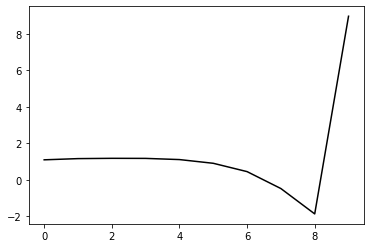

In [37]:
optimizer=tf.optimizers.Adam(learning_rate=0.0005)
for j in range (10000):    
    with tf.GradientTape() as g:
        loss=Error_func(h, m2, lam, alpha, beta, Positive[j%set], Negative[j%set])
        gradients=g.gradient(loss, [h, m2, lam, alpha, beta])
        if np.isnan(loss)==True: break
    for i in range (90):
        optimizer.apply_gradients(zip(gradients, [h]))
        if any(np.isnan(h.numpy()))==True: break
    for i in range (10):
        optimizer.apply_gradients(zip(gradients, [h, m2, lam, alpha, beta]))
        if any(np.isnan(h.numpy()))==True: break
    if j%100==0: 
        print(j*10, Error_func(h, m2, lam, alpha, beta, Positive[np.int32((j/set)%set)], Negative[np.int32((j/set)%set)]).numpy())
        print(m2.numpy(), lam.numpy(), alpha.numpy(), beta.numpy()), print(h.numpy())
        plt.plot(h.numpy(), 'k-'), plt.show()
    if j%1000==0:
        for i in range (set):
            [Positive0[i], Positive1[i]]=NN_func_01(h, m2, lam, alpha, beta, Positive[i])
            [Negative0[i], Negative1[i]]=NN_func_01(h, m2, lam, alpha, beta, Negative[i])
        for i in range (set):
            x_data1[i]=[v[0] for v in Positive0[i]]
            y_data1[i]=[v[1] for v in Positive0[i]]
            x_data2[i]=[v[0] for v in Positive1[i]]
            y_data2[i]=[v[1] for v in Positive1[i]]
            x_data3[i]=[v[0] for v in Negative0[i]]
            y_data3[i]=[v[1] for v in Negative0[i]]
            x_data4[i]=[v[0] for v in Negative1[i]]
            y_data4[i]=[v[1] for v in Negative1[i]]
            plt.plot(x_data4[i], y_data4[i], 'g.')
            plt.plot(x_data2[i], y_data2[i], 'c.')
            plt.plot(x_data1[i], y_data1[i], 'r.')
            plt.plot(x_data3[i], y_data3[i], 'm.')
        plt.show()

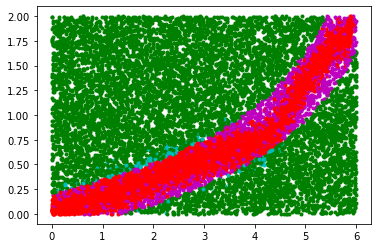

In [38]:
for i in range (set):
    [Positive0[i], Positive1[i]]=NN_func_01(h, m2, lam, alpha, beta, Positive[i])
    [Negative0[i], Negative1[i]]=NN_func_01(h, m2, lam, alpha, beta, Negative[i])
for i in range (set):
    x_data1[i]=[v[0] for v in Positive0[i]]
    y_data1[i]=[v[1] for v in Positive0[i]]
    x_data2[i]=[v[0] for v in Positive1[i]]
    y_data2[i]=[v[1] for v in Positive1[i]]
    x_data3[i]=[v[0] for v in Negative0[i]]         
    y_data3[i]=[v[1] for v in Negative0[i]]
    x_data4[i]=[v[0] for v in Negative1[i]]
    y_data4[i]=[v[1] for v in Negative1[i]]
    plt.plot(x_data4[i], y_data4[i], 'g.')
    plt.plot(x_data2[i], y_data2[i], 'c.')
    plt.plot(x_data1[i], y_data1[i], 'r.')
    plt.plot(x_data3[i], y_data3[i], 'm.')
plt.show()